**Nama              : Nur Ishmawati**

**Kode Peserta : PYTN-KS19-08**

**Program         : Python for Data Science**

**ASSIGNMENT 1**

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install wordcloud
# pip install folium

In [2]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import warnings

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## ANALISIS DATA YANG DIGUNAKAN
Kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori besar/kecil dari Jan 2008-Des 2016.

In [3]:
# Mengambil dataset di folder dataset london crime
df = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [5]:
df.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [6]:
# Mengetahui jumlah baris dan kolom pada dataset
df.shape # (baris, kolom)

(13490604, 7)

In [7]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
# Menampilkan semua kolom dengan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [9]:
# Memeriksa jumlah missing values untuk setiap kolom
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
# Ringkasan singkat setiap kolom menggunakan fungsi describe()
df.describe()

value          year         month
count  1.349060e+07  1.349060e+07  1.349060e+07
mean   4.779444e-01  2.012000e+03  6.500000e+00
std    1.771513e+00  2.581989e+00  3.452053e+00
min    0.000000e+00  2.008000e+03  1.000000e+00
25%    0.000000e+00  2.010000e+03  3.750000e+00
50%    0.000000e+00  2.012000e+03  6.500000e+00
75%    1.000000e+00  2.014000e+03  9.250000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01

Memeriksa seberapa sering suatu nilai muncul pada tiap kolom, maka dapat menggunakan value_counts()

In [11]:
df.lsoa_code.value_counts()

E01003689    3456
E01003783    3456
E01001010    3456
E01001043    3456
E01004735    3456
             ... 
E01001101    1836
E01000001    1728
E01032775    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64

In [12]:
df.borough.value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

Pada kolom borough nilai yang paling sering muncul adalah Croydon sebanyak 602.100 kali

In [13]:
df.major_category.value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Pada kolom major_category nilai yang paling sering muncul adalah Theft and Handling sebanyak 3.966.300 kali

In [14]:
df.minor_category.value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

Pada kolom minor_category nilai yang paling sering muncul adalah Common Assault, Theft From Motor Vehicle, dan Other Theft sebanyak 522.180 kali

In [15]:
df.value.value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

In [16]:
df.year.value_counts()

2016    1498956
2015    1498956
2008    1498956
2012    1498956
2010    1498956
2013    1498956
2014    1498956
2011    1498956
2009    1498956
Name: year, dtype: int64

In [17]:
df.month.value_counts()

11    1124217
5     1124217
3     1124217
6     1124217
7     1124217
4     1124217
9     1124217
8     1124217
12    1124217
1     1124217
10    1124217
2     1124217
Name: month, dtype: int64

In [18]:
# Mengurutkan data pada data set berdasarkan year dan month
df_ur = df.sort_values(['year', 'month'])
df_ur

lsoa_code                 borough               major_category  \
33        E01032741                Havering  Violence Against the Person   
60        E01002678                Hounslow    Other Notifiable Offences   
79        E01004165                  Sutton                      Robbery   
102       E01003225                Lewisham    Other Notifiable Offences   
129       E01001889  Hammersmith and Fulham              Criminal Damage   
...             ...                     ...                          ...   
13489719  E01033594             Westminster           Theft and Handling   
13489779  E01002398              Hillingdon              Criminal Damage   
13490014  E01003168                 Lambeth              Criminal Damage   
13490292  E01002735               Islington           Theft and Handling   
13490579  E01004100                  Sutton                        Drugs   

                            minor_category  value  year  month  
33                              Harassment      0  2008      1  
60                          Going Equipped      0  2008      1  
79                       Personal Property      1  2008      1  
102                         Going Equipped      0  2008      1  
129            Criminal Damage To Dwelling      0  2008      1  
...                                    ...    ...   ...    ...  
13489719     Theft/Taking Of Motor Vehicle      2  2016     12  
13489779             Other Criminal Damage      1  2016     12  
13490014  Criminal Damage To Motor Vehicle      0  2016     12  
13490292             Handling Stolen Goods      0  2016     12  
13490579                  Drug Trafficking      0  2016     12  

[13490604 rows x 7 columns]

In [19]:
# Mencoba memfilter kategori Robbery dari kolom major_category
yr = df[df['major_category'] == 'Robbery']
yr

lsoa_code               borough major_category     minor_category  \
4         E01004563            Wandsworth        Robbery  Personal Property   
7         E01002633              Hounslow        Robbery  Personal Property   
12        E01003852  Richmond upon Thames        Robbery  Personal Property   
50        E01001206                Ealing        Robbery  Personal Property   
66        E01000808               Bromley        Robbery  Personal Property   
...             ...                   ...            ...                ...   
13490536  E01002432            Hillingdon        Robbery  Business Property   
13490557  E01002497            Hillingdon        Robbery  Business Property   
13490576  E01004270         Tower Hamlets        Robbery  Personal Property   
13490600  E01002504            Hillingdon        Robbery  Personal Property   
13490602  E01001134               Croydon        Robbery  Business Property   

          value  year  month  
4             0  2008      6  
7             0  2013      4  
12            0  2014      1  
50            0  2015      7  
66            0  2014      6  
...         ...   ...    ...  
13490536      0  2015      3  
13490557      0  2015      3  
13490576      5  2011      3  
13490600      1  2015      6  
13490602      0  2011      5  

[939384 rows x 7 columns]

In [20]:
# Menjumlahkan baris pada kolom value berdasarkan kelompok tahunnya yang sama
results = (df.groupby('year', axis = 0).sum()).drop(['month'], axis = 1, inplace = False)
results.index.name = None
results

value
2008  738641
2009  717214
2010  715324
2011  724915
2012  737329
2013  686407
2014  680183
2015  711624
2016  736121

<Axes: >

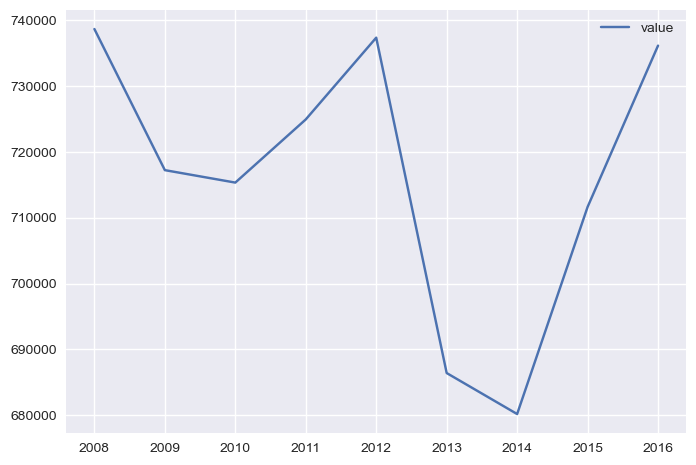

In [21]:
mpl.style.use(['seaborn'])

results.plot()

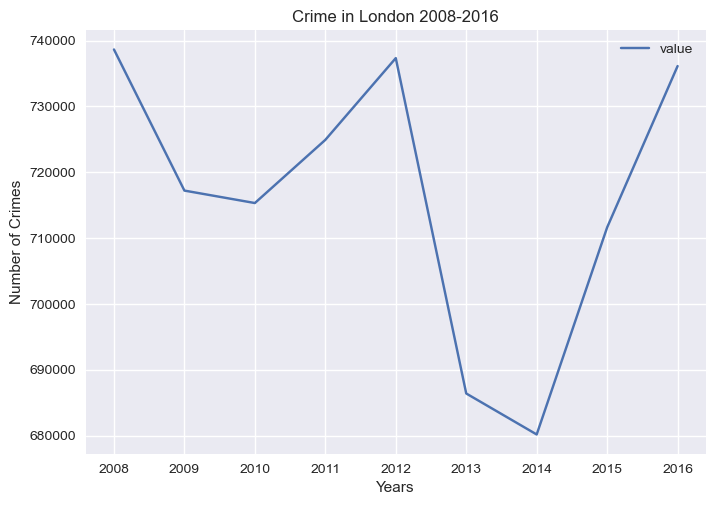

In [22]:
results.plot(kind='line')
plt.title('Crime in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure

In [23]:
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
# Mengeliminasi column yang tidak diperlukan
df2 = df.drop(['lsoa_code', 'borough', 'major_category', 'minor_category', 'month'], axis = 1, inplace = False)
df2

value  year
0             0  2016
1             0  2016
2             0  2015
3             0  2016
4             0  2008
...         ...   ...
13490599      0  2015
13490600      1  2015
13490601      0  2011
13490602      0  2011
13490603      0  2015

[13490604 rows x 2 columns]

In [26]:
# Melakukan filtering untuk tiap-tiap tahun
year_2008 = df2[df2['year'] == 2008].drop(['year'], axis = 1, inplace = False)
year_2009 = df2[df2['year'] == 2009].drop(['year'], axis = 1, inplace = False)
year_2010 = df2[df2['year'] == 2010].drop(['year'], axis = 1, inplace = False)
year_2011 = df2[df2['year'] == 2011].drop(['year'], axis = 1, inplace = False)
year_2012 = df2[df2['year'] == 2012].drop(['year'], axis = 1, inplace = False)
year_2013 = df2[df2['year'] == 2013].drop(['year'], axis = 1, inplace = False)
year_2014 = df2[df2['year'] == 2014].drop(['year'], axis = 1, inplace = False)
year_2015 = df2[df2['year'] == 2015].drop(['year'], axis = 1, inplace = False)
year_2016 = df2[df2['year'] == 2016].drop(['year'], axis = 1, inplace = False)

# Contoh Tampilan hasil filtering
print(year_2008)

          value
4             0
33            0
34            0
46            0
54            1
...         ...
13490564      0
13490567      0
13490573      0
13490586      0
13490594      0

[1498956 rows x 1 columns]


In [27]:
# Mengubah masing-masing data column pertahun menjadi array serta memberikan nama index columnnya
array_2008 = {'2008': year_2008['value'].values}
array_2009 = {'2009': year_2009['value'].values}
array_2010 = {'2010': year_2010['value'].values}
array_2011 = {'2011': year_2011['value'].values}
array_2012 = {'2012': year_2012['value'].values}
array_2013 = {'2013': year_2013['value'].values}
array_2014 = {'2014': year_2014['value'].values}
array_2015 = {'2015': year_2015['value'].values}
array_2016 = {'2016': year_2016['value'].values}

# Contoh Tampilan hasil transformasi ke bentuk array
print(array_2008)

{'2008': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}


In [28]:
# Mengubah masing-masing data array pertahun menjadi column/data frame
df08 = pd.DataFrame(array_2008)
df09 = pd.DataFrame(array_2009)
df10 = pd.DataFrame(array_2010)
df11 = pd.DataFrame(array_2011)
df12 = pd.DataFrame(array_2012)
df13 = pd.DataFrame(array_2013)
df14 = pd.DataFrame(array_2014)
df15 = pd.DataFrame(array_2015)
df16 = pd.DataFrame(array_2016)

# Contoh Tampilan hasil transformasi ke bentuk column
print(df08)

         2008
0           0
1           0
2           0
3           0
4           1
...       ...
1498951     0
1498952     0
1498953     0
1498954     0
1498955     0

[1498956 rows x 1 columns]


In [29]:
# Menyatukan column-column menjadi 1 data frame
dffix = pd.concat([df08, df09, df10, df11, df12, df13, df14, df15, df16], axis=1)
dffix

2008  2009  2010  2011  2012  2013  2014  2015  2016
0           0     1     0     0     0     0     0     0     0
1           0     0     0     0     0     0     1     0     0
2           0     0     0     0     0     0     0     0     0
3           0     3     0     0     0     1     0     0     1
4           1     0     0     2     2     0     0     0     0
...       ...   ...   ...   ...   ...   ...   ...   ...   ...
1498951     0     1     0     0     0     0     0     0     5
1498952     0     1     0     5     0     0     0     0     0
1498953     0     0     0     0     1     1     0     0     0
1498954     0     1     0     0     0     0     0     1     0
1498955     0     3     0     0     0     2     0     0     0

[1498956 rows x 9 columns]

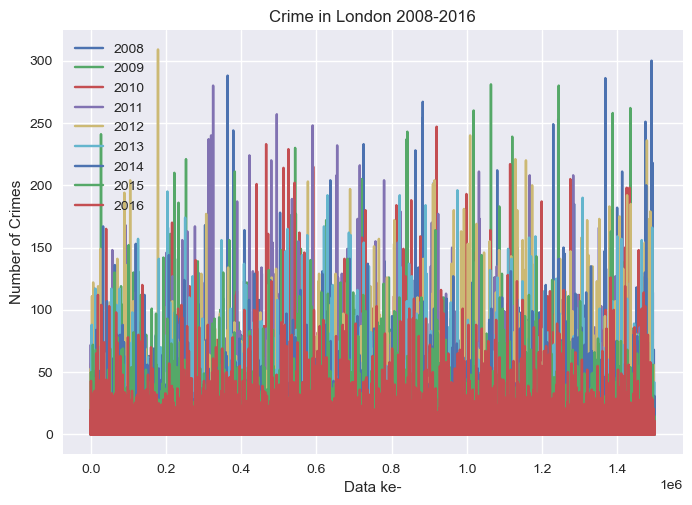

In [30]:
# Visualisasi Data Crimes dalam bentuk per tahun
dffix.plot(kind='line')
plt.title('Crime in London 2008-2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Data ke-')
plt.show() # need this line to show the updates made to the figure

In [31]:
dffix.head()

2008  2009  2010  2011  2012  2013  2014  2015  2016
0     0     1     0     0     0     0     0     0     0
1     0     0     0     0     0     0     1     0     0
2     0     0     0     0     0     0     0     0     0
3     0     3     0     0     0     1     0     0     1
4     1     0     0     2     2     0     0     0     0

## AREA PLOT

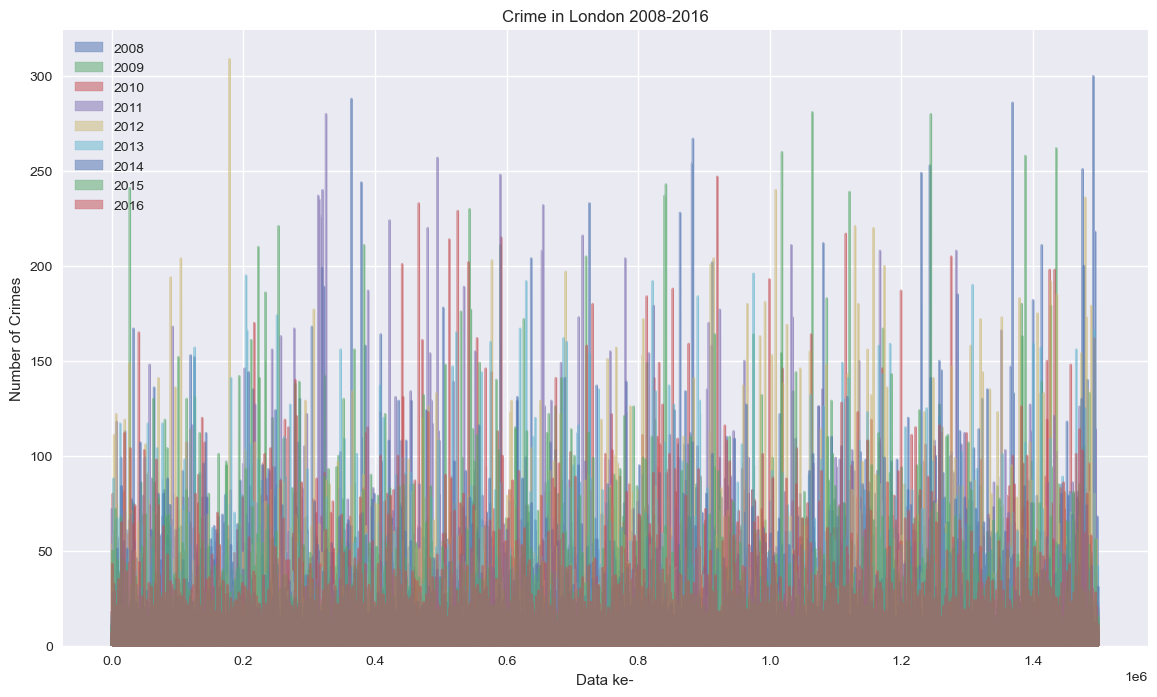

In [32]:
# Visualisasi Data Crimes dalam bentuk per tahun dengan Area Plot
dffix.plot(kind='area', stacked=False, figsize=(14,8))
plt.title('Crime in London 2008-2016') 
plt.ylabel('Number of Crimes')
plt.xlabel('Data ke-')
plt.show()

In [33]:
dffix_20dt = dffix.head(20)
dffix_20dt

2008  2009  2010  2011  2012  2013  2014  2015  2016
0      0     1     0     0     0     0     0     0     0
1      0     0     0     0     0     0     1     0     0
2      0     0     0     0     0     0     0     0     0
3      0     3     0     0     0     1     0     0     1
4      1     0     0     2     2     0     0     0     0
5      0     0     0     0     0     0     0     0     0
6      0     0     0     0     0     0     1     0     0
7      2     0     0     0     0     0     1     0     1
8      0     0     0     0     0     0     0     0     0
9      0     0     1     1     1     0     1     2     4
10     1     0     0     1     0     3     0     0     0
11     0     0     0     1     1     0     0     0     0
12     0     0     0     0     0     0     1     0     0
13     2     0     0     0     0     0     0     0     0
14     0     0     0     0     0     0     1     0     0
15     0     0     0     1     0     1     0     0     0
16     0     0     2     0     1     0     0     1     0
17     0     0     0     0     0     0     0     0     0
18     0     0     0     0     0     0     0     1     1
19     0     1     3     0     9     0     0     0     0

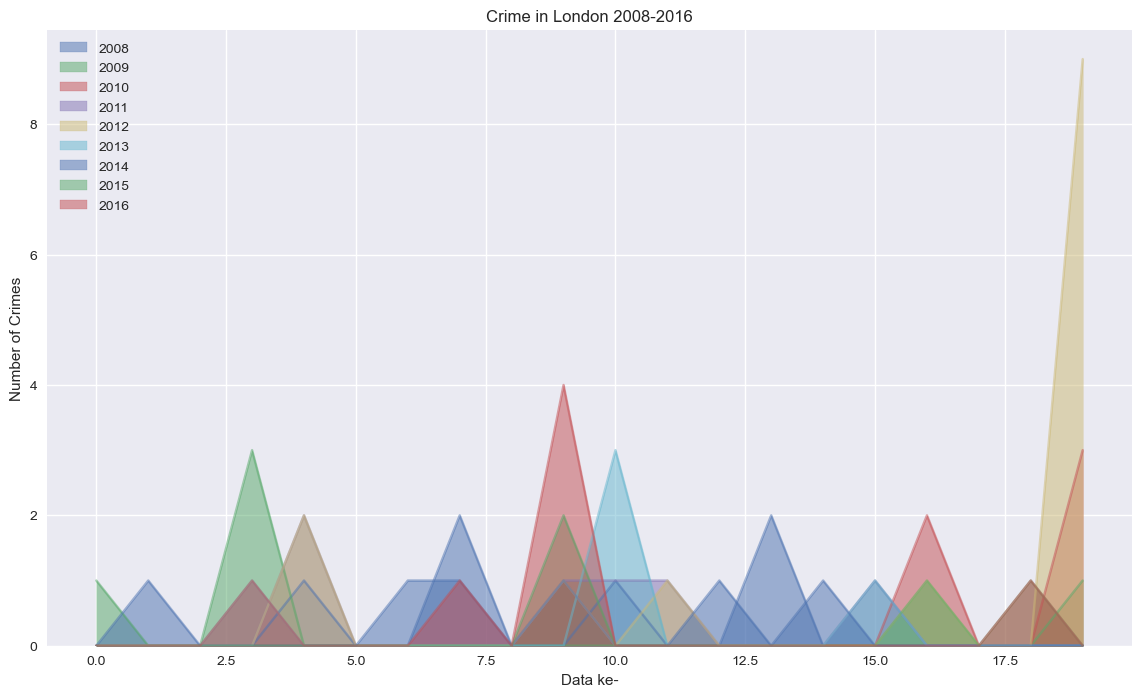

In [34]:
# Visualisasi Data Crimes dalam bentuk per tahun berdasrkan 20 data pertama dengan Area Plot
dffix_20dt.plot(kind='area', stacked=False, figsize=(14,8))
plt.title('Crime in London 2008-2016') 
plt.ylabel('Number of Crimes')
plt.xlabel('Data ke-')
plt.show()

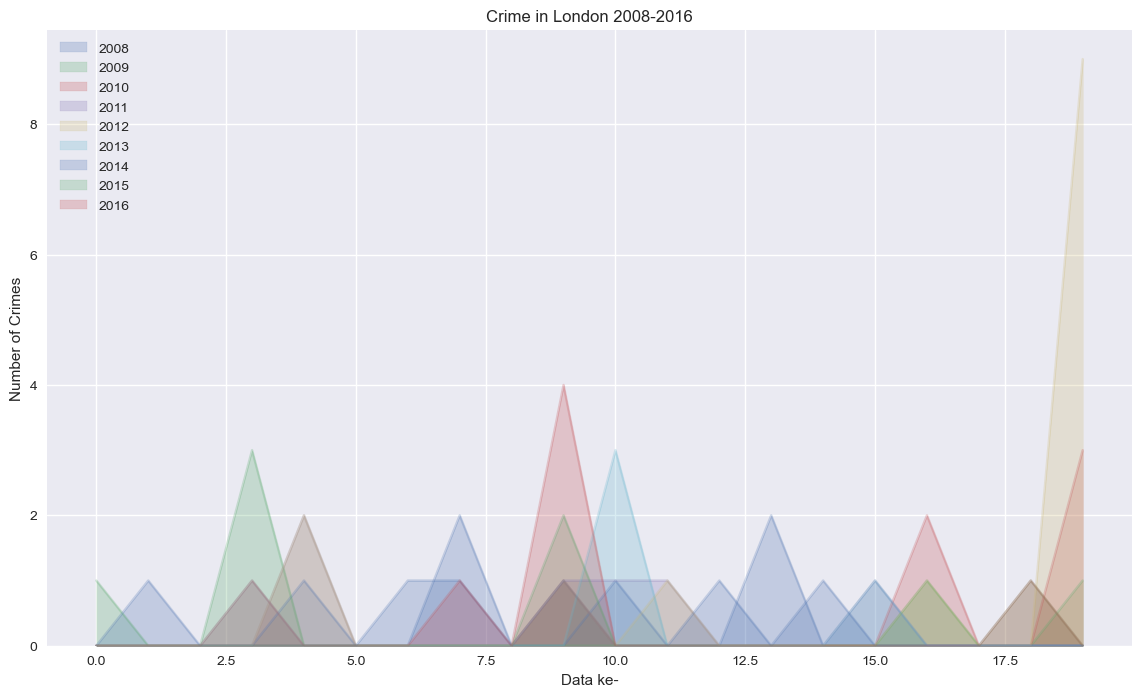

In [35]:
# Visualisasi Data Crimes dalam bentuk per tahun berdasrkan 20 data pertama dengan Area Plot (penambahan alpha untuk setting tebal warna area)
dffix_20dt.plot(kind='area', stacked=False, figsize=(14,8), alpha=0.25)
plt.title('Crime in London 2008-2016') 
plt.ylabel('Number of Crimes')
plt.xlabel('Data ke-')
plt.show()

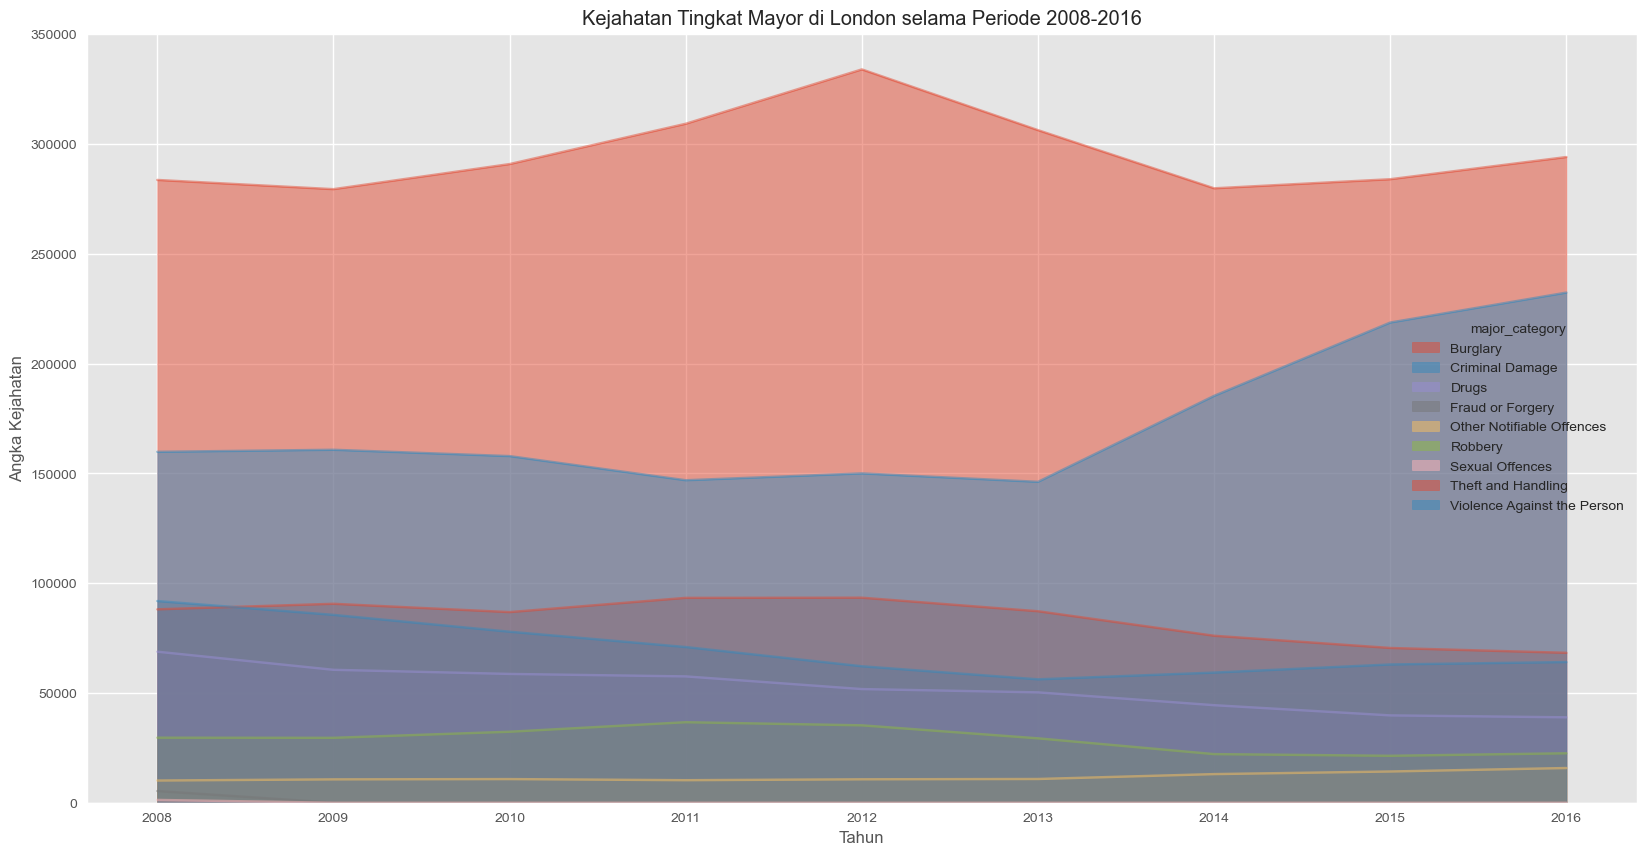

In [36]:
mpl.style.use(['ggplot']) #style
crimeMajorCategoryInYears = df.groupby(['year', 'major_category']).sum()['value'].reset_index()

crimeMajorCategoryInYears.pivot(index = 'year', columns='major_category', values='value').plot(kind='area', stacked = False, figsize=(20,10))
plt.title('Kejahatan Tingkat Mayor di London selama Periode 2008-2016')  
plt.ylabel('Angka Kejahatan') 
plt.xlabel('Tahun') 

plt.show()

Berdasarkan grafik, 3 kejahatan mayor teratas di London selama periode 2008-2016 adalah Theft and Handling, Violence Against the Person, dan Burglary. Theft and Handling selalu berada di peringkat teratas dengan kisaran di atas 250.000 kasus setiap tahunnya. Lalu, disusul oleh Violence Against the Person yang setiap tahunnya memiliki kasus di atas 100.000 dan pada tahun 2013 kejahatan ini mengalami peningkatan yang cukup signifikan hingga tahun-tahun berikutnya. Sedangkan untuk kejahatan yang lain kasus setiap tahunnya di bawah 100.000 dan cenderung stabil setiap tahunnya.

## HISTOGRAM

In [37]:
crimeBorough = df.groupby(['borough'], axis=0).sum()['value']
crimeBorough.head()

borough
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Name: value, dtype: int64

In [38]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(crimeBorough)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


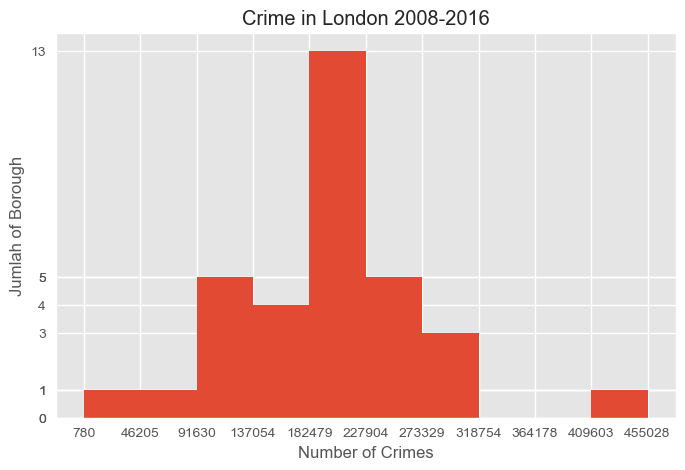

In [39]:
crimeBorough.plot(kind='hist', figsize=(8, 5), xticks=bin_edges, yticks=count)

plt.title('Crime in London 2008-2016') # add a title to the histogram
plt.ylabel('Jumlah of Borough') # add y-label
plt.xlabel('Number of Crimes') # add x-label

plt.show()

Dari visualisasi histogram di atas maka dapat ditarik sebuah kesimpulan:

1. Ada 13 wilayah yang memiliki total kasus kejahatan antara *182.479-227.904* kasus
2. Ada 5 wilayah yang memiliki total kasus kejahatan antara *91.630-137.054* kasus
3. Ada 5 wilayah yang memiliki total kasus kejahatan antara *227.904-273.329* kasus
4. Ada 4 wilayah yang memiliki total kasus kejahatan antara *137.054-182.479* kasus
5. Ada 3 wilayah yang memiliki total kasus kejahatan antara *273.329-318.754* kasus
6. Ada 1 wilayah yang memiliki total kasus kejahatan antara *780-46.205* kasus
7. Ada 1 wilayah yang memiliki total kasus kejahatan antara *46.205-91.630* kasus
8. Ada 1 wilayah yang memiliki total kasus kejahatan antara *409.603-455.028* kasus

## Bar Chart

Pada tahun berapa kasus kejahatan tertinggi di seluruh wilayah?

### Vertical Bar Plot

In [40]:
results

value
2008  738641
2009  717214
2010  715324
2011  724915
2012  737329
2013  686407
2014  680183
2015  711624
2016  736121

<Axes: >

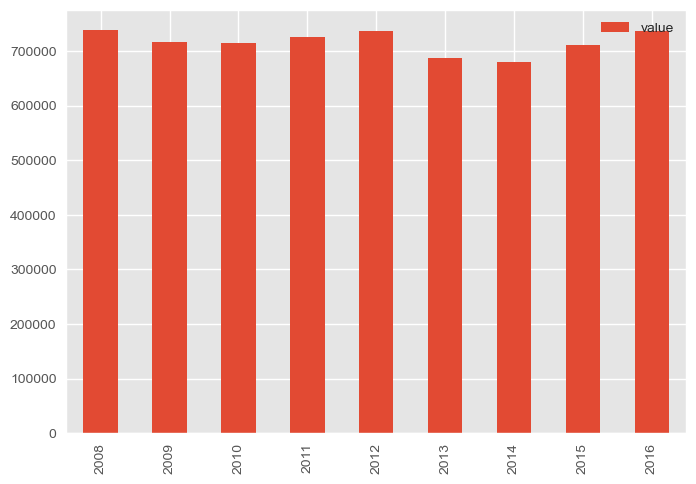

In [41]:
results.plot.bar()

Tahun dengan kasus kejahatan tertinggi yang terjadi di seluruh wilayah london adalah di tahun 2008, kemudian tertinggi kedua adalah di tahun 2012, dan tertinggi ketiga yaitu di tahun 2016.

Pada tahun berapa kasus kejahatan tertinggi di wilayah Croydon?

In [42]:
dfb = df[['borough','value','year']]
dfb

borough  value  year
0            Croydon      0  2016
1          Greenwich      0  2016
2            Bromley      0  2015
3          Redbridge      0  2016
4         Wandsworth      0  2008
...              ...    ...   ...
13490599       Brent      0  2015
13490600  Hillingdon      1  2015
13490601      Sutton      0  2011
13490602     Croydon      0  2011
13490603      Merton      0  2015

[13490604 rows x 3 columns]

In [43]:
croydon = dfb[dfb['borough'] == 'Croydon']
croydon

borough  value  year
0         Croydon      0  2016
42        Croydon      0  2010
43        Croydon      1  2014
55        Croydon      0  2012
83        Croydon      0  2008
...           ...    ...   ...
13490513  Croydon      0  2008
13490516  Croydon      0  2016
13490577  Croydon      0  2015
13490595  Croydon      0  2012
13490602  Croydon      0  2011

[602100 rows x 3 columns]

In [44]:
cr_2008 = croydon[croydon['year'] == 2008].drop(['year'], axis = 1, inplace = False)
cr_2009 = croydon[croydon['year'] == 2009].drop(['year'], axis = 1, inplace = False)
cr_2010 = croydon[croydon['year'] == 2010].drop(['year'], axis = 1, inplace = False)
cr_2011 = croydon[croydon['year'] == 2011].drop(['year'], axis = 1, inplace = False)
cr_2012 = croydon[croydon['year'] == 2012].drop(['year'], axis = 1, inplace = False)
cr_2013 = croydon[croydon['year'] == 2013].drop(['year'], axis = 1, inplace = False)
cr_2014 = croydon[croydon['year'] == 2014].drop(['year'], axis = 1, inplace = False)
cr_2015 = croydon[croydon['year'] == 2015].drop(['year'], axis = 1, inplace = False)
cr_2016 = croydon[croydon['year'] == 2016].drop(['year'], axis = 1, inplace = False)

cr_2008

borough  value
83        Croydon      0
329       Croydon      1
438       Croydon      1
676       Croydon      0
1058      Croydon      0
...           ...    ...
13489583  Croydon      0
13489800  Croydon      1
13489988  Croydon      0
13490422  Croydon      0
13490513  Croydon      0

[66900 rows x 2 columns]

In [45]:
crt8 = cr_2008['value'].sum()
crt9 = cr_2009['value'].sum()
crt10 = cr_2010['value'].sum()
crt11 = cr_2011['value'].sum()
crt12 = cr_2012['value'].sum()
crt13 = cr_2013['value'].sum()
crt14 = cr_2014['value'].sum()
crt15 = cr_2015['value'].sum()
crt16 = cr_2016['value'].sum()
crt1 = np.array([crt8, crt9, crt10, crt11, crt12, crt13, crt14, crt15, crt16])
crt2 = {'Value': crt1}
crt2

{'Value': array([29516, 29784, 29373, 29830, 30189, 27444, 27357, 28089, 28712],
       dtype=int64)}

In [46]:
crr = pd.DataFrame(crt2)
crr

Value
0  29516
1  29784
2  29373
3  29830
4  30189
5  27444
6  27357
7  28089
8  28712

In [47]:
yr1 = {'Years': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]}
year1 = pd.DataFrame(yr1)
crry = pd.concat([year1, crr], axis=1)
crry

Years  Value
0   2008  29516
1   2009  29784
2   2010  29373
3   2011  29830
4   2012  30189
5   2013  27444
6   2014  27357
7   2015  28089
8   2016  28712

In [48]:
crry.set_index('Years', inplace=True)
crry.index.name = None

Text(0.5, 1.0, 'Crime in London/Croydon 2008-2016')

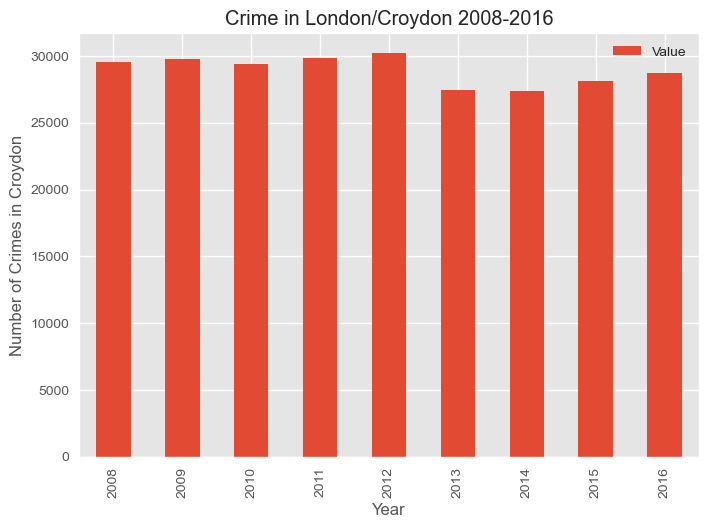

In [49]:
crry.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of Crimes in Croydon')
plt.title('Crime in London/Croydon 2008-2016')

Text(0.5, 1.0, 'Crime in London/Croydon 2008-2016')

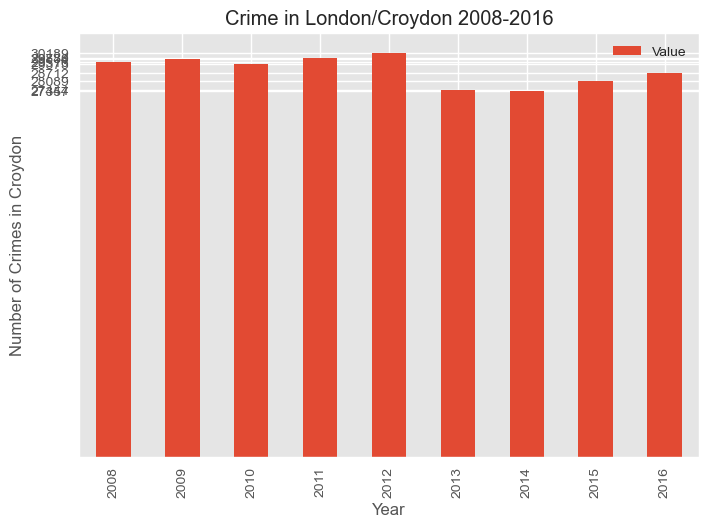

In [50]:
crry.plot.bar(yticks=crt1)
plt.xlabel('Year')
plt.ylabel('Number of Crimes in Croydon')
plt.title('Crime in London/Croydon 2008-2016')

Kasus kejahatan yang terjadi di wilayah Croydon pada tahun 2008 sampai 2016, kasus kejahatan **tertinggi** terjadi pada **tahun 2012**, kemudian tertinggi kedua adalah di tahun 2011, dan tertinggi ketiga yaitu di tahun 2009, serta jumlah kasus **terendah** di **tahun 2014**.

Ingin mengetahui wilayah yang memiliki angka kejahatan tertinggi dan terendah di London

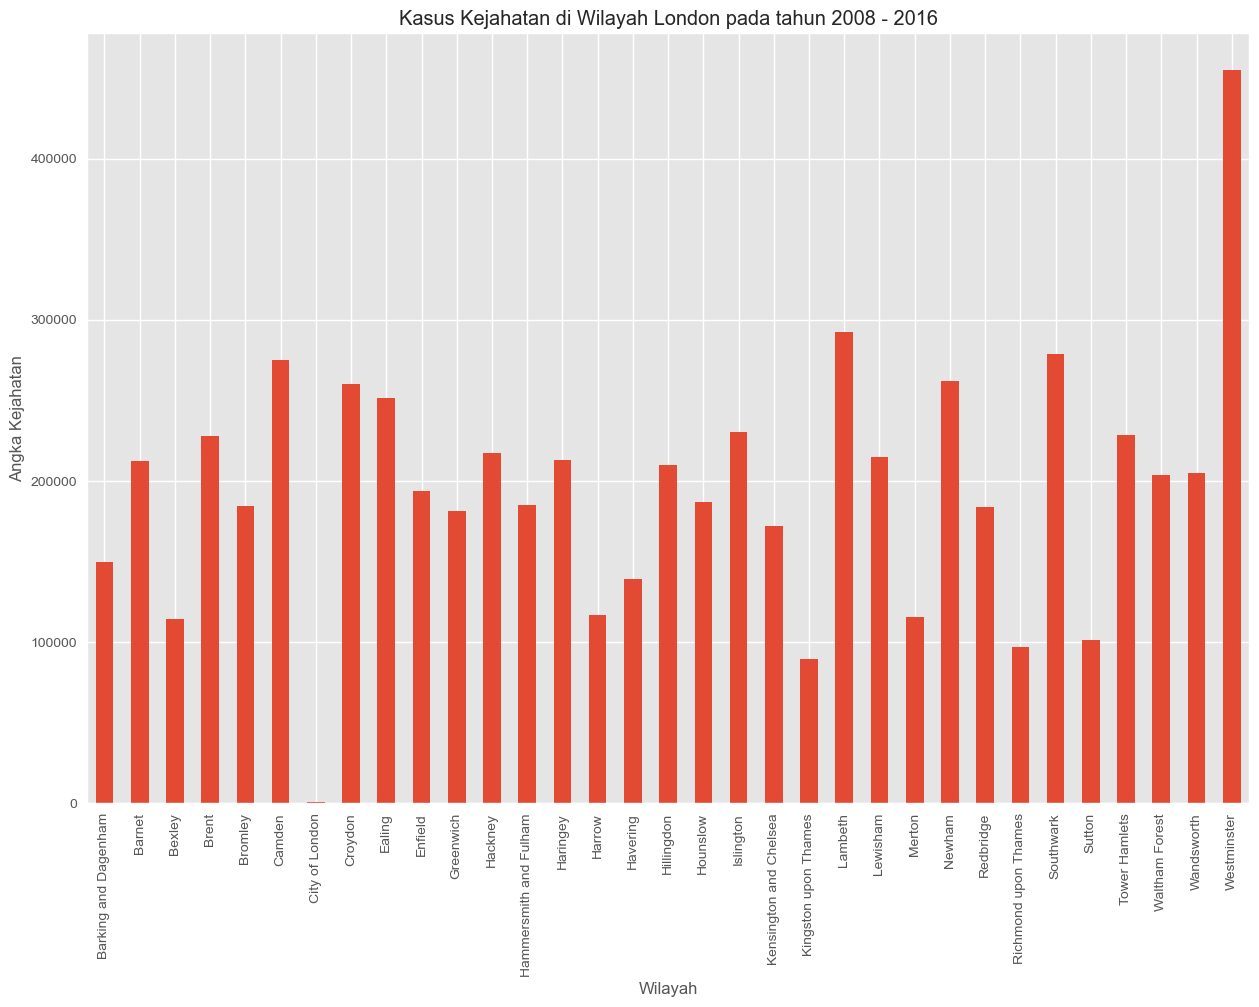

In [51]:
crimeBorough = df.groupby(['borough'], axis=0).sum()['value']
crimeBorough.plot(kind = 'bar', figsize=(15,10))

plt.title('Kasus Kejahatan di Wilayah London pada tahun 2008 - 2016')
plt.xlabel('Wilayah')
plt.ylabel('Angka Kejahatan')

plt.show()

Pada gambar grafik di atas terlihat total kasus kejahatan yang terjadi di wilayah London pada periode tahun 2008 sampai 2016. Wilayah **Westminster** memimpin dengan total kasus kejahatan di angka **400.000** kasus dan wilayah **City of London** memiliki kasus kejahatan paling sedikit. Sedangkan, pada wilayah lain kasus kejahatan yang terjadi rata-rata berada di angka **100.000** ke atas.

### Horizontal Bar Plot

In [154]:
dfm = df[['major_category','value','year']]
dfm

major_category  value  year
0                            Burglary      0  2016
1         Violence Against the Person      0  2016
2         Violence Against the Person      0  2015
3                            Burglary      0  2016
4                             Robbery      0  2008
...                               ...    ...   ...
13490599              Criminal Damage      0  2015
13490600                      Robbery      1  2015
13490601                     Burglary      0  2011
13490602                      Robbery      0  2011
13490603  Violence Against the Person      0  2015

[13490604 rows x 3 columns]

In [53]:
df.major_category.value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [54]:
dfm1 = dfm[dfm['major_category'] == 'Theft and Handling'].drop(['year'], axis = 1, inplace = False)
dfm2 = dfm[dfm['major_category'] == 'Violence Against the Person'].drop(['year'], axis = 1, inplace = False)
dfm3 = dfm[dfm['major_category'] == 'Criminal Damage'].drop(['year'], axis = 1, inplace = False)
dfm4 = dfm[dfm['major_category'] == 'Drugs'].drop(['year'], axis = 1, inplace = False)
dfm5 = dfm[dfm['major_category'] == 'Burglary'].drop(['year'], axis = 1, inplace = False)
dfm6 = dfm[dfm['major_category'] == 'Robbery'].drop(['year'], axis = 1, inplace = False)
dfm7 = dfm[dfm['major_category'] == 'Other Notifiable Offences'].drop(['year'], axis = 1, inplace = False)
dfm8 = dfm[dfm['major_category'] == 'Fraud or Forgery'].drop(['year'], axis = 1, inplace = False)
dfm9 = dfm[dfm['major_category'] == 'Sexual Offences'].drop(['year'], axis = 1, inplace = False)

dfm7

major_category  value
45        Other Notifiable Offences      0
60        Other Notifiable Offences      0
102       Other Notifiable Offences      0
108       Other Notifiable Offences      0
116       Other Notifiable Offences      0
...                             ...    ...
13490525  Other Notifiable Offences      0
13490531  Other Notifiable Offences      0
13490553  Other Notifiable Offences      0
13490559  Other Notifiable Offences      0
13490561  Other Notifiable Offences      0

[776304 rows x 2 columns]

In [55]:
major_cr = {'major_category': np.array(['Theft and Handling', 'Violence Against the Person', 'Drugs', 'Burglary', 'Criminal Damage', 'Robbery', 'Other Notifiable Offences', 'Fraud or Forgery', 'Sexual Offences'])}
major_cr

{'major_category': array(['Theft and Handling', 'Violence Against the Person', 'Drugs',
        'Burglary', 'Criminal Damage', 'Robbery',
        'Other Notifiable Offences', 'Fraud or Forgery', 'Sexual Offences'],
       dtype='<U27')}

In [56]:
dfm11 = dfm1['value'].sum()
dfm12 = dfm2['value'].sum()
dfm13 = dfm3['value'].sum()
dfm14 = dfm4['value'].sum()
dfm15 = dfm5['value'].sum()
dfm16 = dfm6['value'].sum()
dfm17 = dfm7['value'].sum()
dfm18 = dfm8['value'].sum()
dfm19 = dfm9['value'].sum()

dfmm1 = np.array([dfm11, dfm12, dfm13, dfm14, dfm15, dfm16, dfm17, dfm18, dfm19])
dfmm2 = {'Value': dfmm1}
dfmm2

{'Value': array([2661861, 1558081,  630938,  470765,  754293,  258873,  106349,
           5325,    1273], dtype=int64)}

In [57]:
major = pd.DataFrame(major_cr)
vmajor = pd.DataFrame(dfmm2)
dfmajor = pd.concat([major, vmajor], axis=1)
dfmajor

major_category    Value
0           Theft and Handling  2661861
1  Violence Against the Person  1558081
2                        Drugs   630938
3                     Burglary   470765
4              Criminal Damage   754293
5                      Robbery   258873
6    Other Notifiable Offences   106349
7             Fraud or Forgery     5325
8              Sexual Offences     1273

In [58]:
dfmajor.set_index('major_category', inplace=True)
dfmajor.index.name = None
dfmajor

Value
Theft and Handling           2661861
Violence Against the Person  1558081
Drugs                         630938
Burglary                      470765
Criminal Damage               754293
Robbery                       258873
Other Notifiable Offences     106349
Fraud or Forgery                5325
Sexual Offences                 1273

In [59]:
dfmajor.sort_values(by='Value', ascending=True, inplace=True)

In [60]:
dfmajor

Value
Sexual Offences                 1273
Fraud or Forgery                5325
Other Notifiable Offences     106349
Robbery                       258873
Burglary                      470765
Drugs                         630938
Criminal Damage               754293
Violence Against the Person  1558081
Theft and Handling           2661861

Text(0.5, 1.0, 'Crime in London 2008-2016')

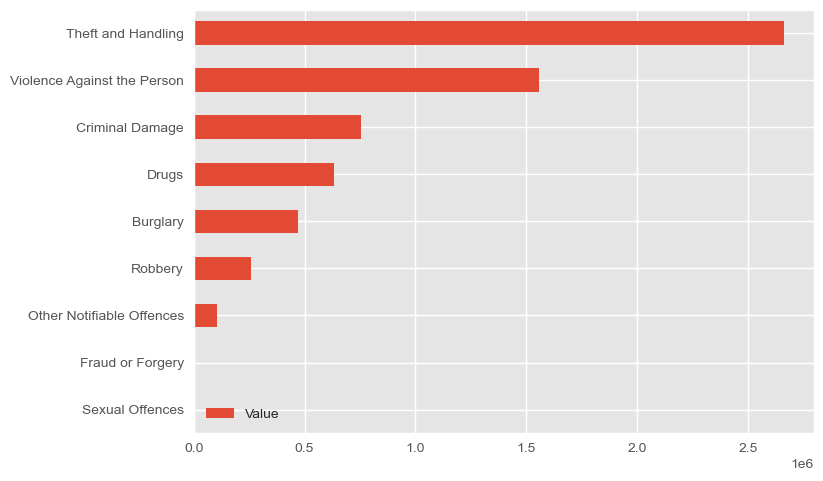

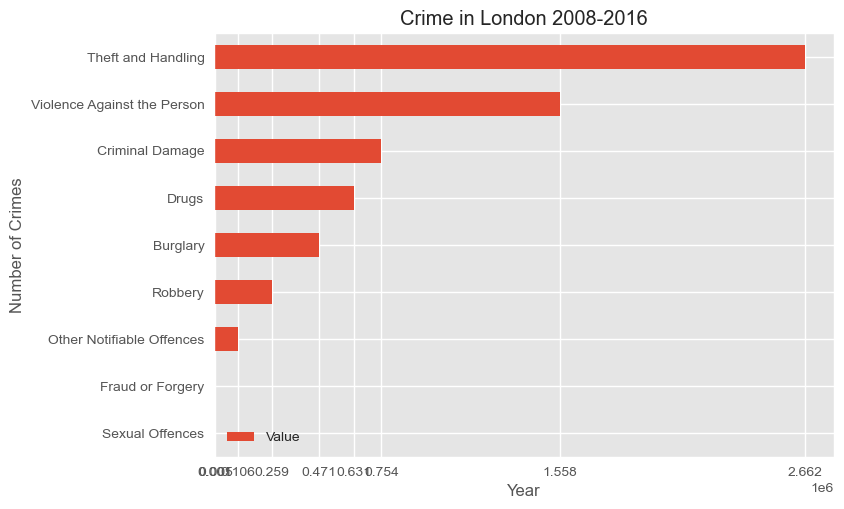

In [61]:
dfmajor.plot.barh()
dfmajor.plot.barh(xticks=dfmm1)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime in London 2008-2016')

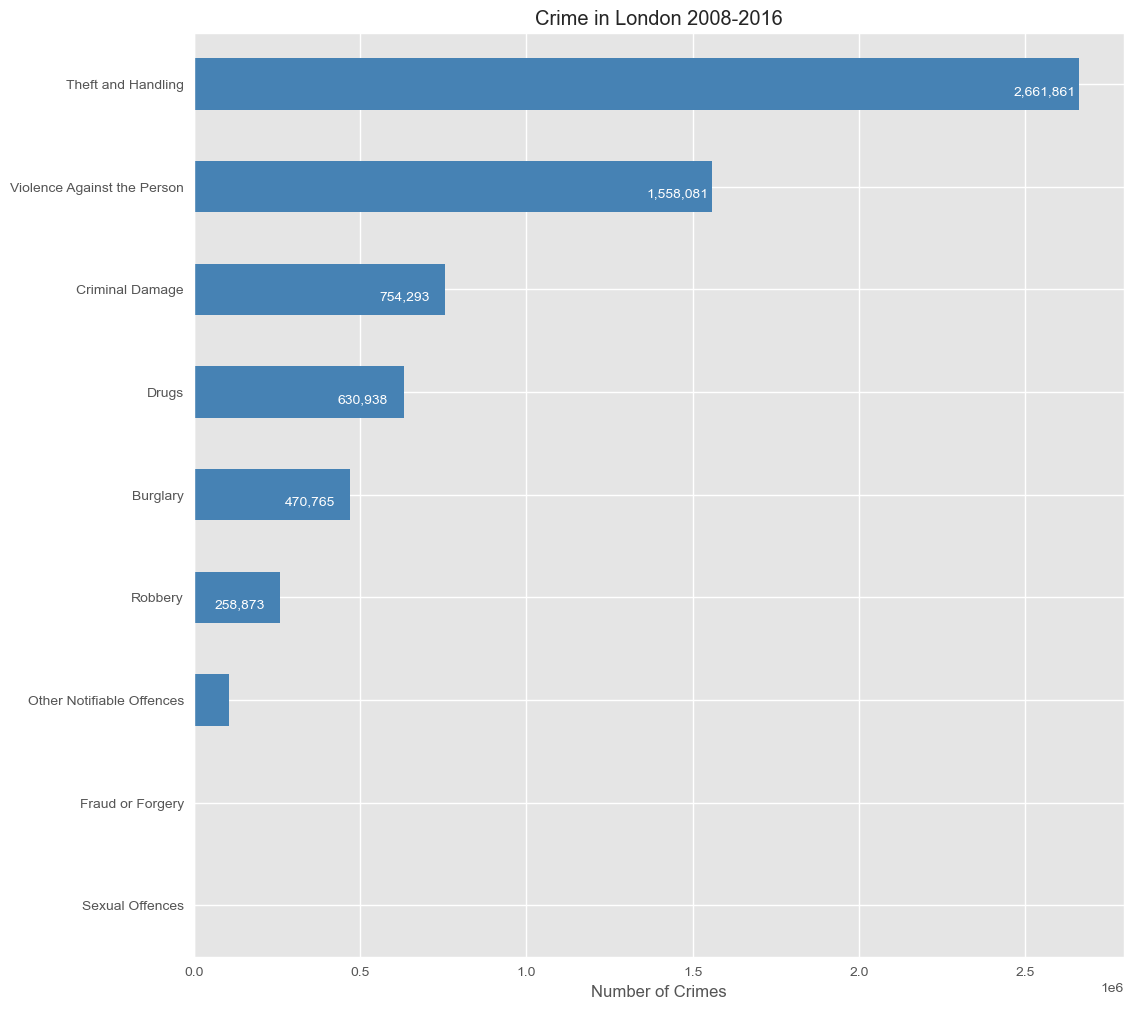

('Theft and Handling',
 'Violence Against the Person',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Robbery',
 'Other Notifiable Offences',
 'Fraud or Forgery',
 'Sexual Offences')

In [62]:
dfmajor1 = dfmajor['Value']
dfmajor1.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Crimes')
plt.title('Crime in London 2008-2016')

for index, value in enumerate (dfmajor1):
    label = format(int(value), ',') # format int with commas
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 197000, index - 0.10), color='white')

plt.show()

'Theft and Handling', 'Violence Against the Person', 'Burglary', 'Criminal Damage', 'Drugs', 'Robbery', 'Other Notifiable Offences', 'Fraud or Forgery', 'Sexual Offences'

## PIE CHART

Kategori kejahatan tingkat mayor apa yang paling sering terjadi dan jarang terjadi di London?

In [63]:
df_pie = (df.groupby('major_category', axis = 0).sum()).drop(['year', 'month'], axis = 1, inplace = False)
df_pie

value
major_category                      
Burglary                      754293
Criminal Damage               630938
Drugs                         470765
Fraud or Forgery                5325
Other Notifiable Offences     106349
Robbery                       258873
Sexual Offences                 1273
Theft and Handling           2661861
Violence Against the Person  1558081

<Axes: ylabel='value'>

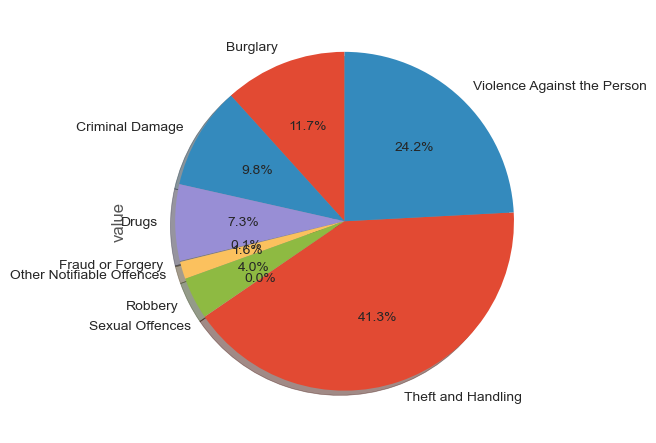

In [64]:
df_pie['value'].plot(kind='pie',
            autopct='%1.1f%%',
            startangle = 90,
            shadow=True)

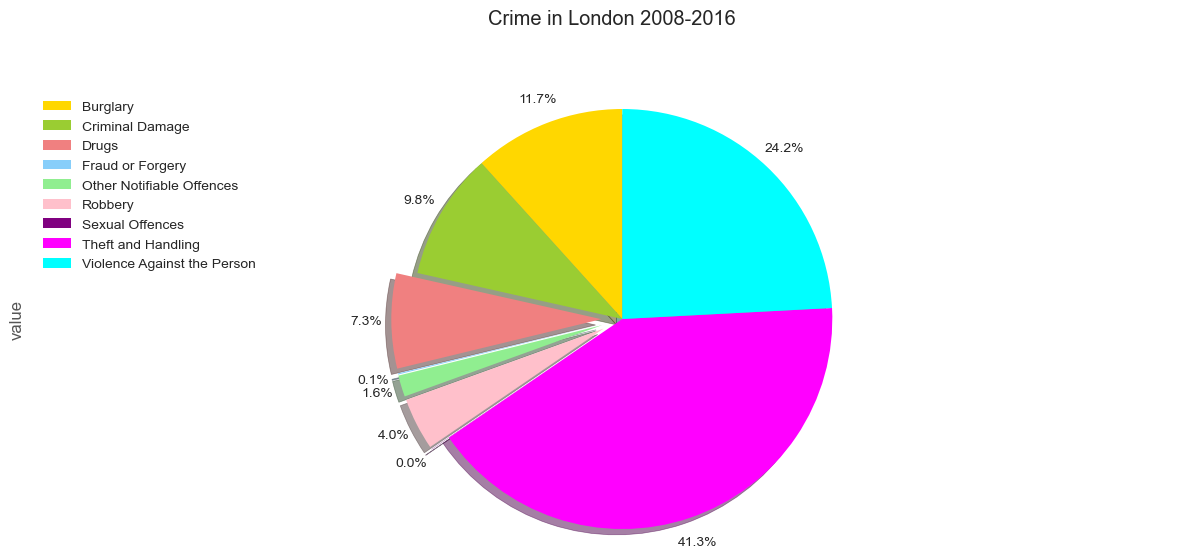

In [65]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'purple', 'magenta', 'cyan']
explode_list = [0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0] # ratio for each continent with which tooffset each wedge.
df_pie['value'].plot(kind='pie',
                     figsize=(15, 6),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, # turn off labels on pie chart
                     pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct
                     colors=colors_list, # add custom colors 
                     explode=explode_list # 'explode' lowest 3 continents
                    )

# scale the title up by 12% to match pctdistance 
plt.title('Crime in London 2008-2016', y=1.12)
plt.axis('equal')
# add legend
plt.legend (labels=df_pie.index, loc='upper left')
plt.show()

Berdasarkan pie chart di atas, kasus kejahatan yang paling sering terjadi di London adalah **Theft and Handling** sebesar **41.3%**, disusul oleh **Violence Against the Person** dengan persentase **24.2%**, dan di urutan ketiga ada **Burglary** sebesar **11.7%**. Sedangkan untuk kasus kejahatan yang jarang terjadi di London adalah **Sexual Offences** sebesar **0.0%** dan kasus **Fraud or Forgery** hanya sebesar **0.1%**.

## BOX PLOT

Bagaimana distribusi data statistik wilayah City of London?

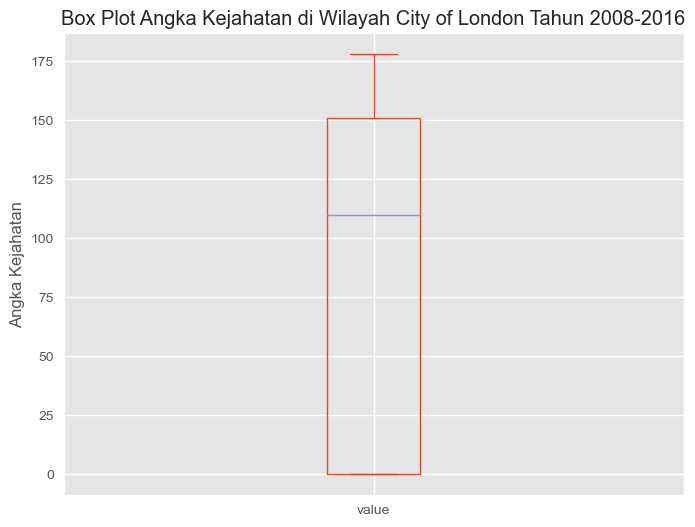

In [66]:
crimeBorough = df.groupby(['borough','year'], axis=0).sum()['value']
# boroughMinorCrime = df.groupby(['borough', 'minor_category', 'year'], axis=0).sum()['value'].reset_index()
crimeCoL = crimeBorough['City of London']

crimeCoL.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot Angka Kejahatan di Wilayah City of London Tahun 2008-2016')
plt.ylabel('Angka Kejahatan')

plt.show()

In [67]:
crimeCoL.describe()

count      9.000000
mean      86.666667
std       72.128358
min        0.000000
25%        0.000000
50%      110.000000
75%      151.000000
max      178.000000
Name: value, dtype: float64

Berdasarkan box plot di atas, maka:

1. Jumlah minimum angka kejahatan di City of London adalah 0, jumlah maksimum sekitar 178, dan jumlah median imigran sekitar 110.
2. 25% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 0 (Kuartil pertama).
3. 75% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 151 atau lebih (Kuartil ketiga).

Bagaimana distribusi data statistik dari kejahatan major "Burglary"?

In [68]:
dfm

major_category  value  year
0                            Burglary      0  2016
1         Violence Against the Person      0  2016
2         Violence Against the Person      0  2015
3                            Burglary      0  2016
4                             Robbery      0  2008
...                               ...    ...   ...
13490599              Criminal Damage      0  2015
13490600                      Robbery      1  2015
13490601                     Burglary      0  2011
13490602                      Robbery      0  2011
13490603  Violence Against the Person      0  2015

[13490604 rows x 3 columns]

In [69]:
df_B = dfm[(dfm['major_category'] == 'Burglary')]
df_V = dfm[(dfm['major_category'] == 'Violence Against the Person')]
df_V

major_category  value  year
1         Violence Against the Person      0  2016
2         Violence Against the Person      0  2015
6         Violence Against the Person      0  2010
11        Violence Against the Person      0  2015
13        Violence Against the Person      0  2011
...                               ...    ...   ...
13490585  Violence Against the Person      0  2011
13490588  Violence Against the Person      0  2015
13490592  Violence Against the Person      2  2013
13490595  Violence Against the Person      0  2012
13490603  Violence Against the Person      0  2015

[3171744 rows x 3 columns]

In [70]:
bg1 = (df_B.groupby('year', axis = 0).sum())
bg1.index.name = None
bg2 = bg1.rename(columns = {'value':'Burglary'}, inplace=False)
bg2

Burglary
2008     88092
2009     90619
2010     86826
2011     93315
2012     93392
2013     87222
2014     76053
2015     70489
2016     68285

<Axes: >

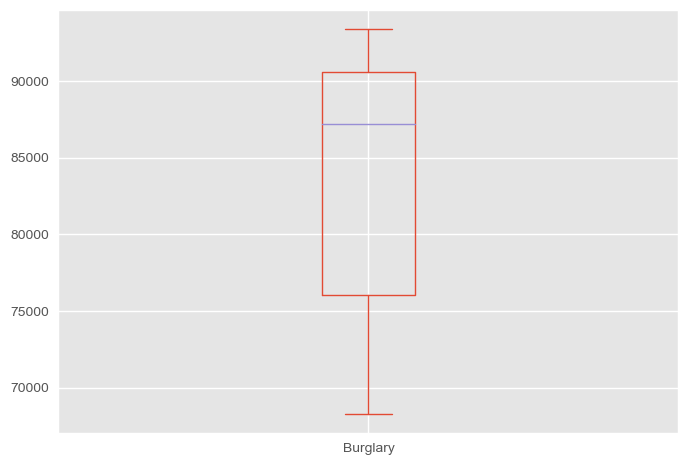

In [71]:
bg2.plot.box()

In [72]:
bg2.describe()

Burglary
count      9.000000
mean   83810.333333
std     9658.166674
min    68285.000000
25%    76053.000000
50%    87222.000000
75%    90619.000000
max    93392.000000

Berdasarkan box plot di atas, maka:

1. Jumlah minimum angka kejahatan Burglary adalah 68285, jumlah maksimum sekitar 93392, dan jumlah median imigran sekitar 87222.
2. 25% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 76053 (Kuartil pertama).
3. 75% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 90619 atau lebih (Kuartil ketiga).

Bagaimana distribusi data statistik dari kejahatan major "Violence Against the Person"?

In [73]:
vc1 = (df_V.groupby('year', axis = 0).sum())
vc1.index.name = None
vc2 = vc1.rename(columns = {'value':'Violence Against the Person'}, inplace=False)
vc2

Violence Against the Person
2008                       159844
2009                       160777
2010                       157894
2011                       146901
2012                       150014
2013                       146181
2014                       185349
2015                       218740
2016                       232381

<Axes: >

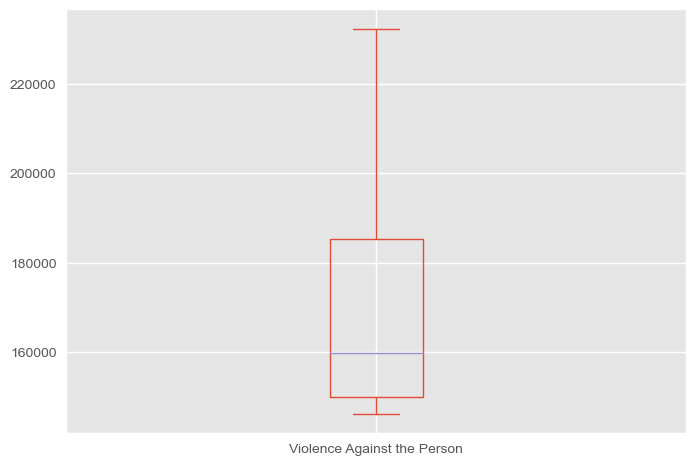

In [74]:
vc2.plot.box()

In [75]:
vc2.describe()

Violence Against the Person
count                     9.000000
mean                 173120.111111
std                   32113.207526
min                  146181.000000
25%                  150014.000000
50%                  159844.000000
75%                  185349.000000
max                  232381.000000

Berdasarkan box plot di atas, maka:

1. Jumlah minimum angka kejahatan Violence Against the Person adalah 146181, jumlah maksimum sekitar 232381, dan jumlah median imigran sekitar 159844.
2. 25% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 150014 (Kuartil pertama).
3. 75% tahun untuk periode 2008 - 2016 memiliki angka kejahatan tahunan 185349 atau lebih (Kuartil ketiga).

In [76]:
df_BV = pd.concat([bg2, vc2], axis=1)
df_BV

Burglary  Violence Against the Person
2008     88092                       159844
2009     90619                       160777
2010     86826                       157894
2011     93315                       146901
2012     93392                       150014
2013     87222                       146181
2014     76053                       185349
2015     70489                       218740
2016     68285                       232381

<Axes: >

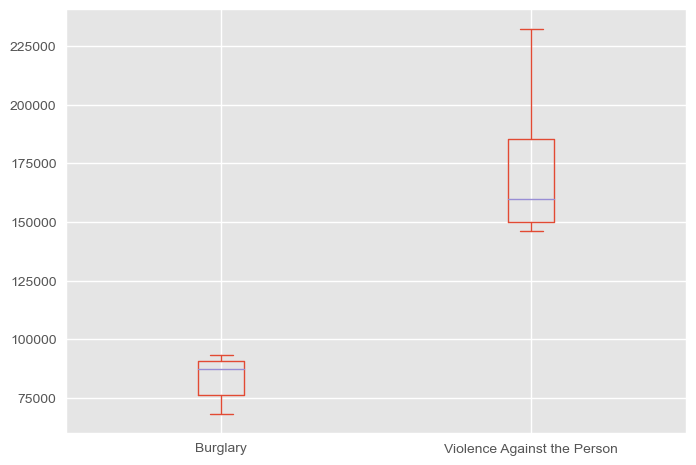

In [77]:
df_BV.plot.box()

<Axes: >

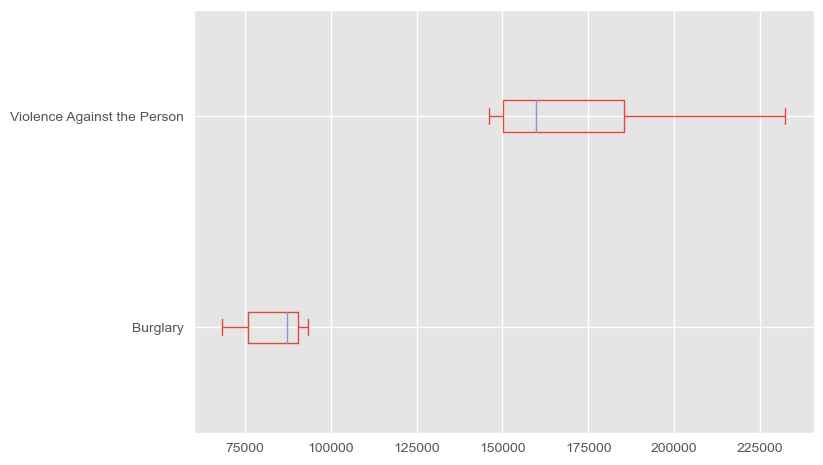

In [78]:
df_BV.plot.box(vert=False)

## SUBPLOTS

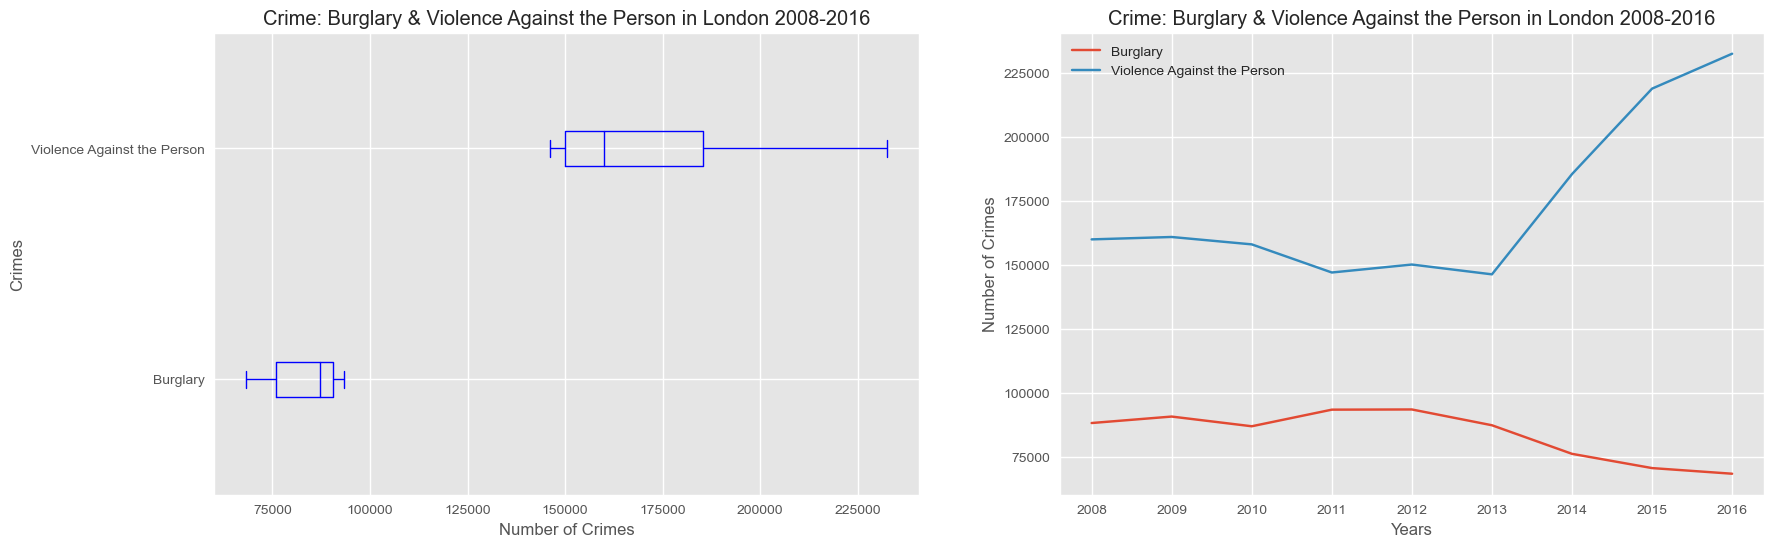

In [79]:
fig = plt.figure() # create figure
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot) .See tip below**

# Subplot 1: Box plot
df_BV.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Crime: Burglary & Violence Against the Person in London 2008-2016') 
ax0.set_xlabel('Number of Crimes')
ax0.set_ylabel('Crimes')

# Subplot 2: Line plot
df_BV.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2 
ax1.set_title ('Crime: Burglary & Violence Against the Person in London 2008-2016')
ax1.set_ylabel('Number of Crimes')
ax1.set_xlabel('Years')
plt.show()

In [80]:
df_C = dfm[(dfm['major_category'] == 'Criminal Damage')]

cd1 = (df_C.groupby('year', axis = 0).sum())
cd1.index.name = None
cd2 = cd1.rename(columns = {'value':'Criminal Damage'}, inplace=False)
cd2

Criminal Damage
2008            91872
2009            85565
2010            77897
2011            70914
2012            62158
2013            56206
2014            59279
2015            62976
2016            64071

In [81]:
df_BVC = pd.concat([df_BV, cd2], axis=1)
df_BVC

Burglary  Violence Against the Person  Criminal Damage
2008     88092                       159844            91872
2009     90619                       160777            85565
2010     86826                       157894            77897
2011     93315                       146901            70914
2012     93392                       150014            62158
2013     87222                       146181            56206
2014     76053                       185349            59279
2015     70489                       218740            62976
2016     68285                       232381            64071

In [82]:
sp = df_BVC.transpose()
sp

2008    2009    2010    2011    2012    2013  \
Burglary                      88092   90619   86826   93315   93392   87222   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Criminal Damage               91872   85565   77897   70914   62158   56206   

                               2014    2015    2016  
Burglary                      76053   70489   68285  
Violence Against the Person  185349  218740  232381  
Criminal Damage               59279   62976   64071

<Axes: >

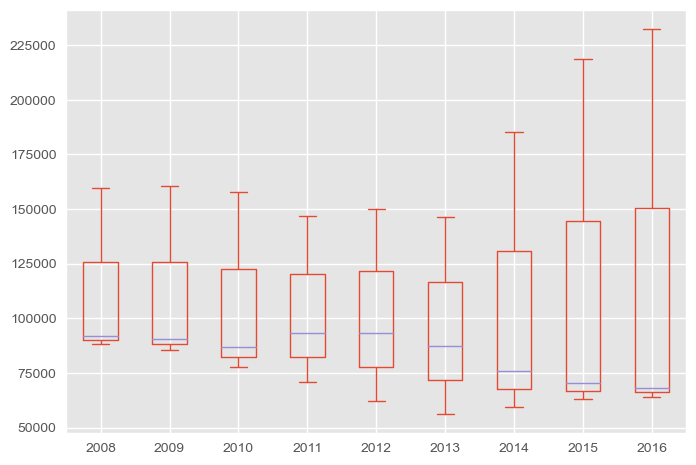

In [83]:
sp.plot(kind='box')

## SCATTER PLOT

Pada bulan ke-berapa jumlah angka kejahatan di London mencapai yang tertinggi dan terendah pada tahun 2009?

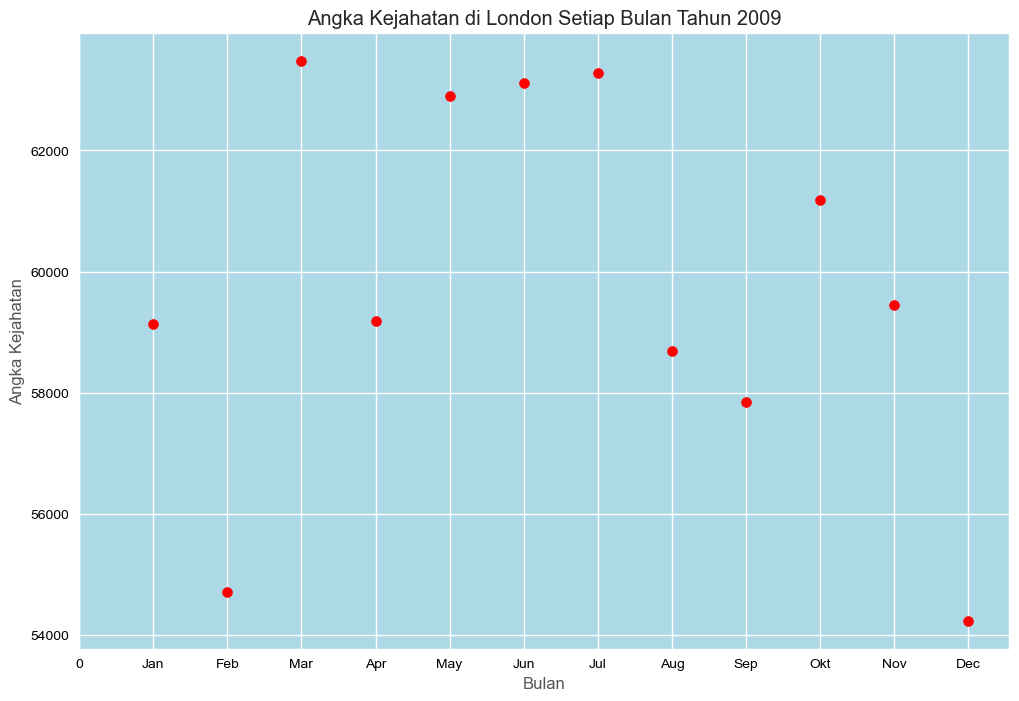

In [84]:
crime2009 = df.loc[df['year'] == 2009]
months = crime2009['month'].unique()
months.sort()

total = crime2009.groupby('month').sum()['value']
name_of_month= [0, 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
n= np.arange(len(months)+1)
x_range= range(1,13)

plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Angka Kejahatan di London Setiap Bulan Tahun 2009")
plt.xlabel("Bulan")
plt.ylabel("Angka Kejahatan")
plt.xticks(n, name_of_month)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(color='white')
plt.show()

Berdasarkan scatter plot yang telah dibuat, kasus kejahatan terendah pada tahun 2009 terjadi pada bulan **Desember** di bawah **56.000 kasus** dan kasus kejahatan tertinggi terjadi pada bulan **Maret** di kisaran angka **62.000 kasus** ke atas.

In [85]:
scplt = results
scplt['year'] = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
scplt['no'] = [0, 1, 2, 3, 4, 5, 6, 7, 8]
scplt.set_index('no', inplace=True)
scplt.index.name = None
scplt

value  year
0  738641  2008
1  717214  2009
2  715324  2010
3  724915  2011
4  737329  2012
5  686407  2013
6  680183  2014
7  711624  2015
8  736121  2016

<Axes: xlabel='year', ylabel='value'>

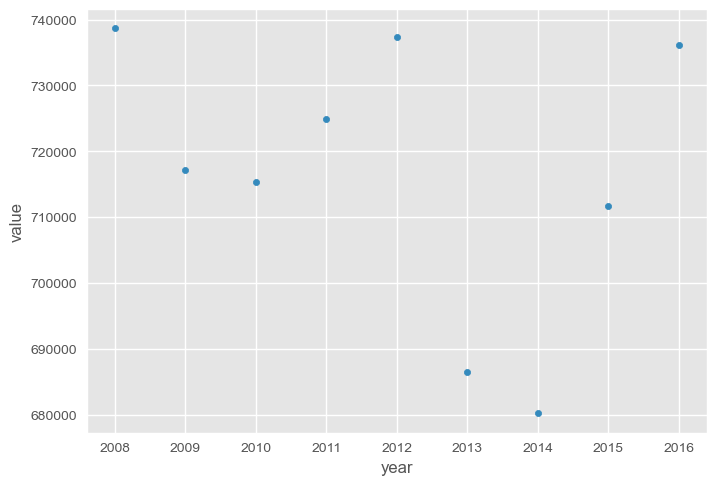

In [86]:
scplt.plot.scatter(x = 'year', y ='value')

In [87]:
results

value  year
0  738641  2008
1  717214  2009
2  715324  2010
3  724915  2011
4  737329  2012
5  686407  2013
6  680183  2014
7  711624  2015
8  736121  2016

## WORD CLOUD

Apa kata-kata kejahatan tingkat minor yang sering muncul dalam kasus kejahatan di London?

In [88]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


In [89]:
from wordcloud import WordCloud, STOPWORDS

In [90]:
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [91]:
crimeBorough 

borough               year
Barking and Dagenham  2008    17656
                      2009    17713
                      2010    17130
                      2011    16686
                      2012    15990
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: value, Length: 297, dtype: int64

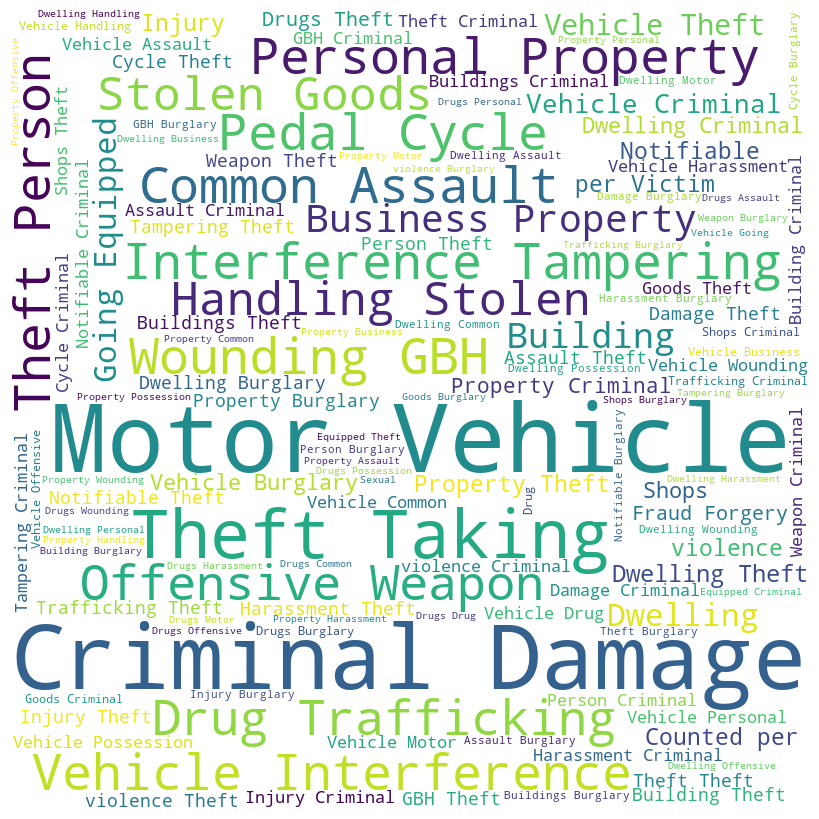

In [92]:
wc08 = df[df['year'] == 2008]['minor_category']

text08 = " ".join(wc08)


wordcloud08 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text08)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud08) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2008

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2008. Kata-kata tersebut adalah Criminal Damage dan Motor Vehicle, kemudian disusul dengan Theft Taking.

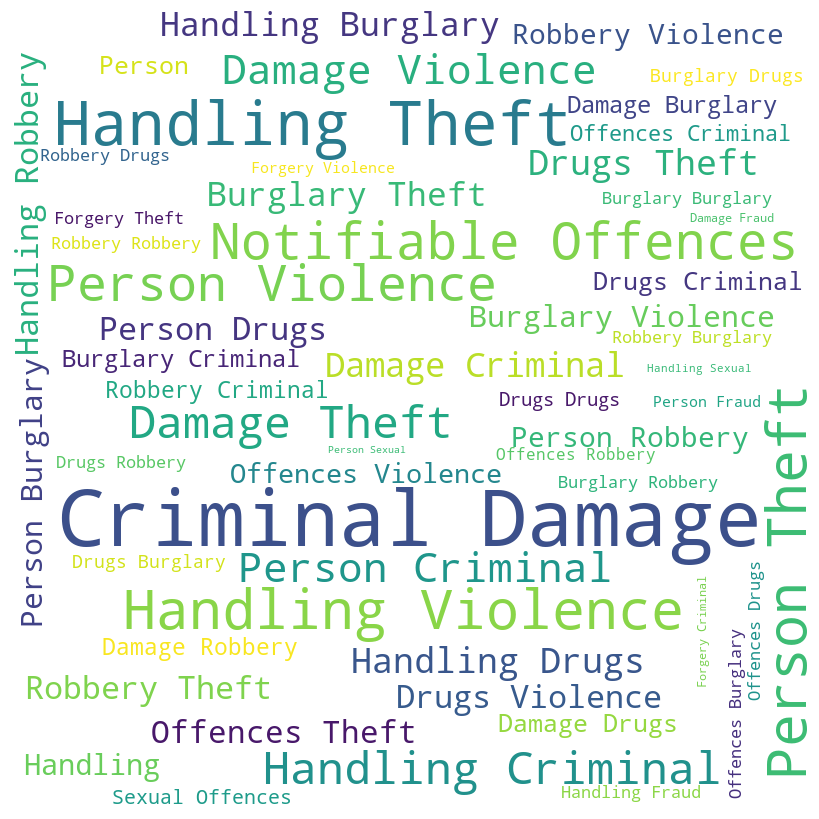

In [93]:
wc08 = df[df['year'] == 2008]['major_category']

text08 = " ".join(wc08)


wordcloud08 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text08)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud08) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2008

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2008. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

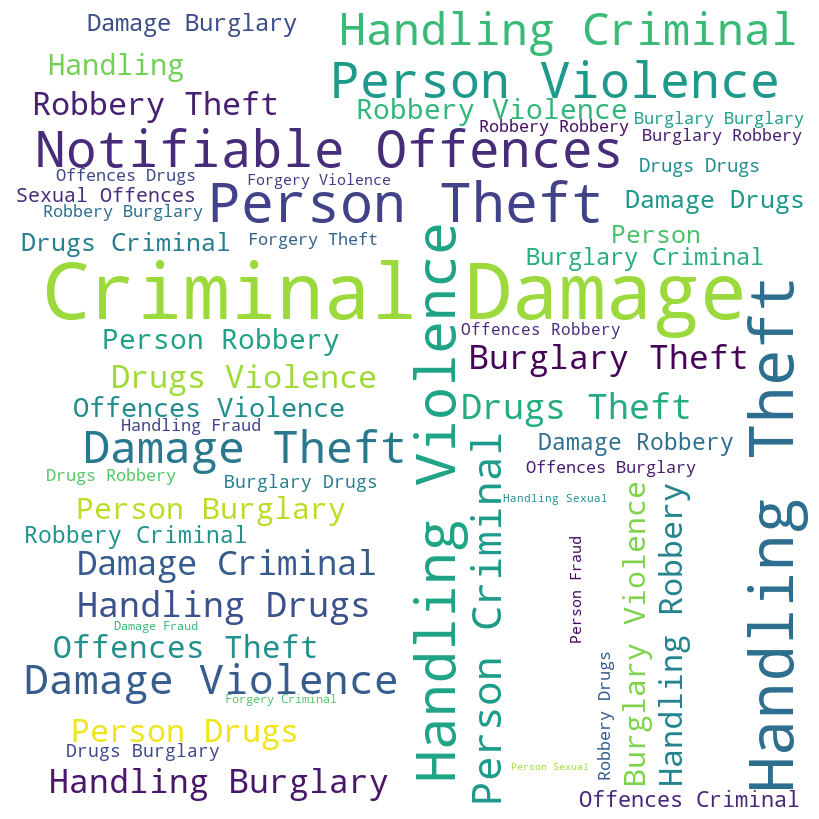

In [94]:
wc09 = df[df['year'] == 2009]['minor_category']

text09 = " ".join(wc08)


wordcloud09 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text09)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud09) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2009

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2009. Kata-kata tersebut adalah Criminal Damage, Person Theft, Handling Theft, Handling Violence, Person Violence.

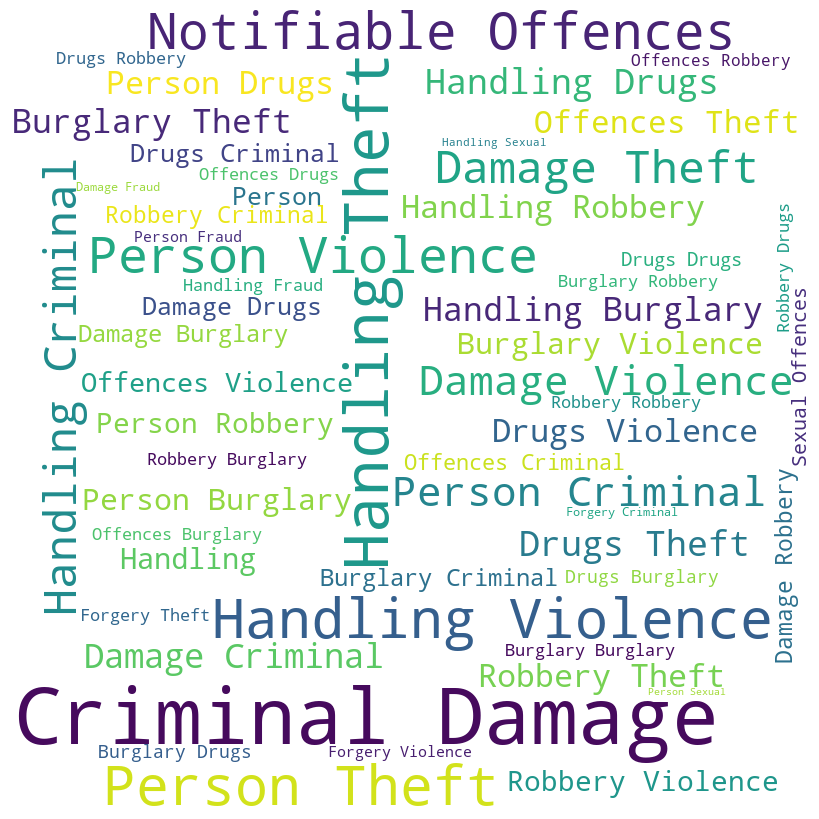

In [95]:
wc09 = df[df['year'] == 2009]['major_category']

text09 = " ".join(wc08)


wordcloud09 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text09)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud09) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2009

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2009. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

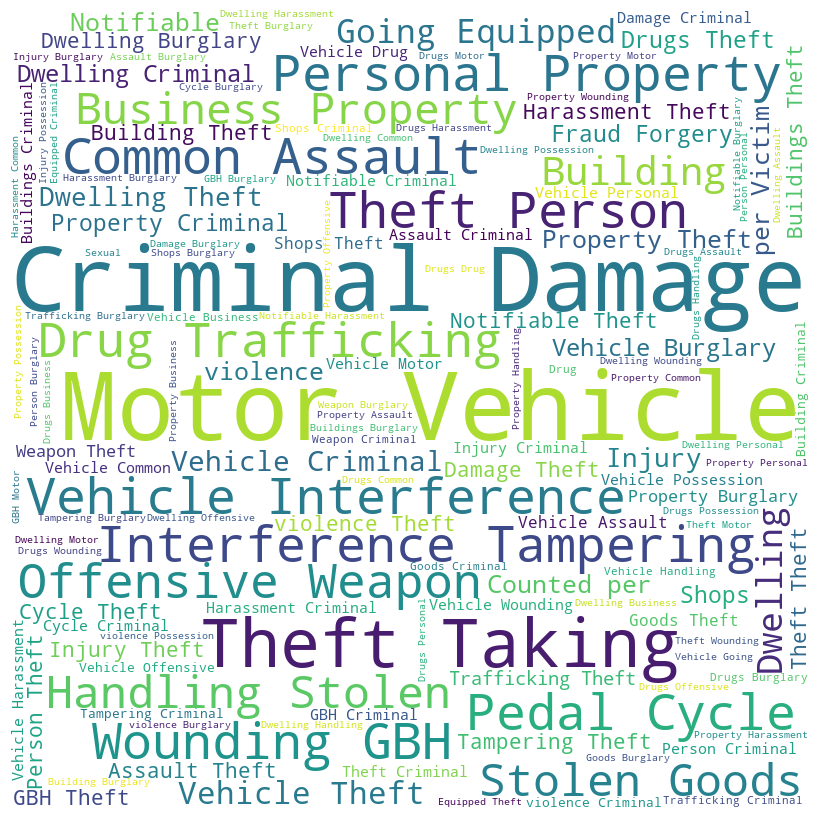

In [96]:
wc10 = df[df['year'] == 2010]['minor_category']

text10 = " ".join(wc10)


wordcloud10 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text10)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud10) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2010

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2010. Kata-kata tersebut adalah Criminal Damage dan Motor Vehicle, kemudian disusul dengan Theft Taking.

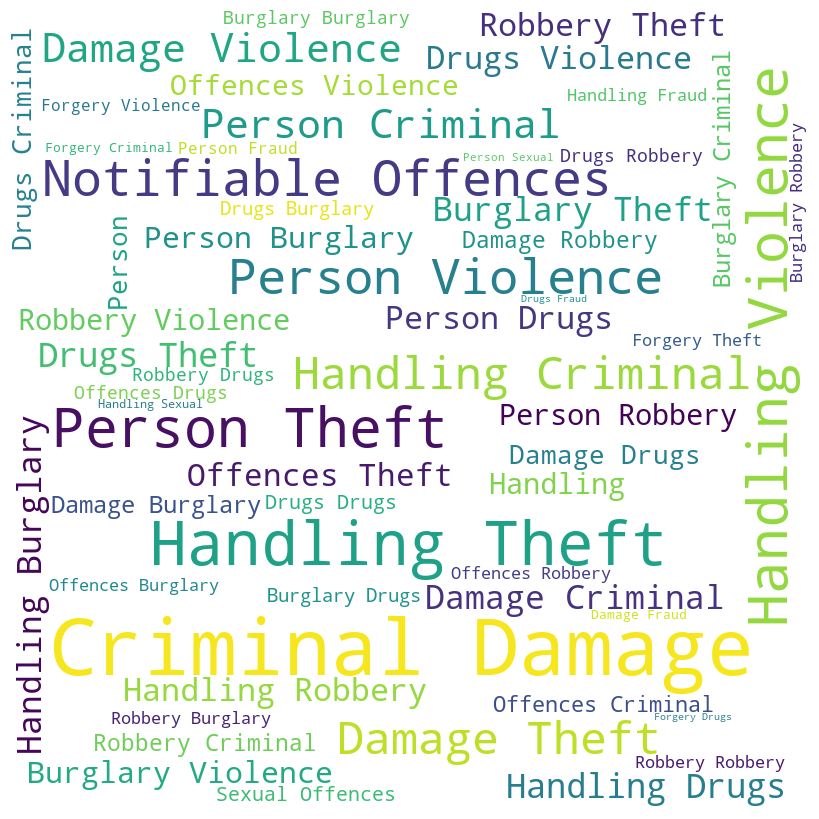

In [97]:
wc10 = df[df['year'] == 2010]['major_category']

text10 = " ".join(wc10)


wordcloud10 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text10)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud10) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2010

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2010. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

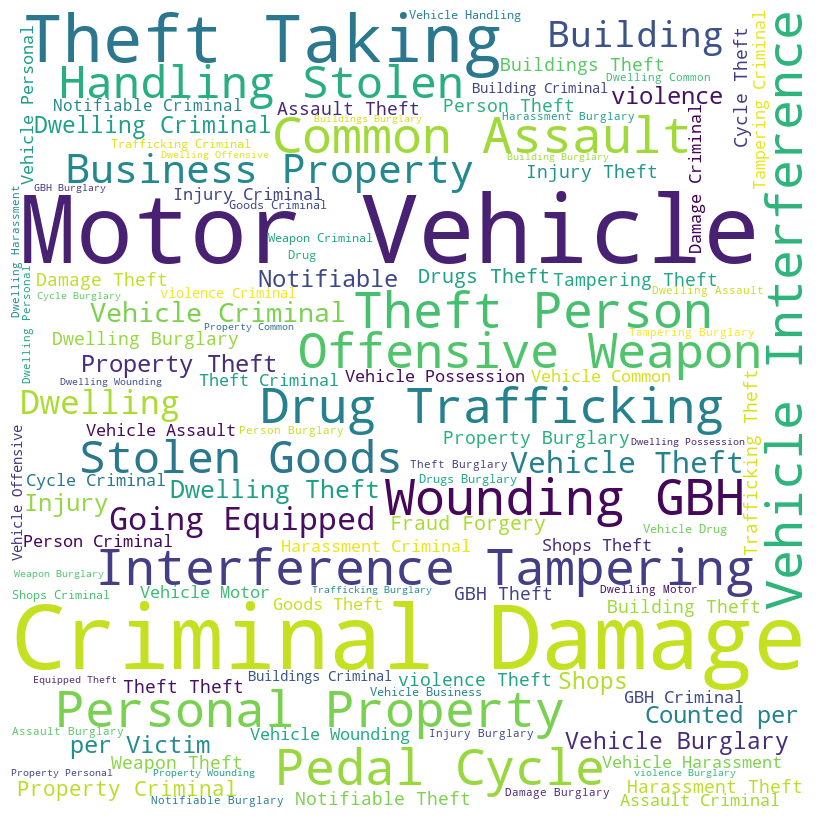

In [98]:
wc11 = df[df['year'] == 2011]['minor_category']

text11 = " ".join(wc11)


wordcloud11 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text11)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud11) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2011

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2011. Kata-kata tersebut adalah Criminal Damage, Motor Vehicle, kemudian disusul dengan Theft Taking.

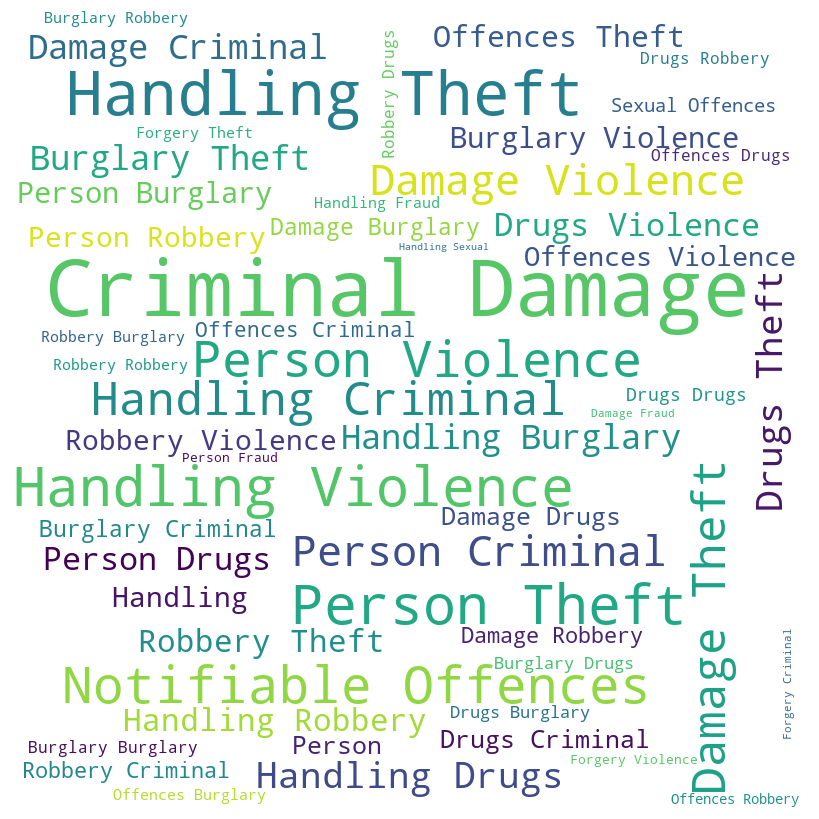

In [99]:
wc11 = df[df['year'] == 2011]['major_category']

text11 = " ".join(wc11)


wordcloud11 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text11)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud11) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2011

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2011. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

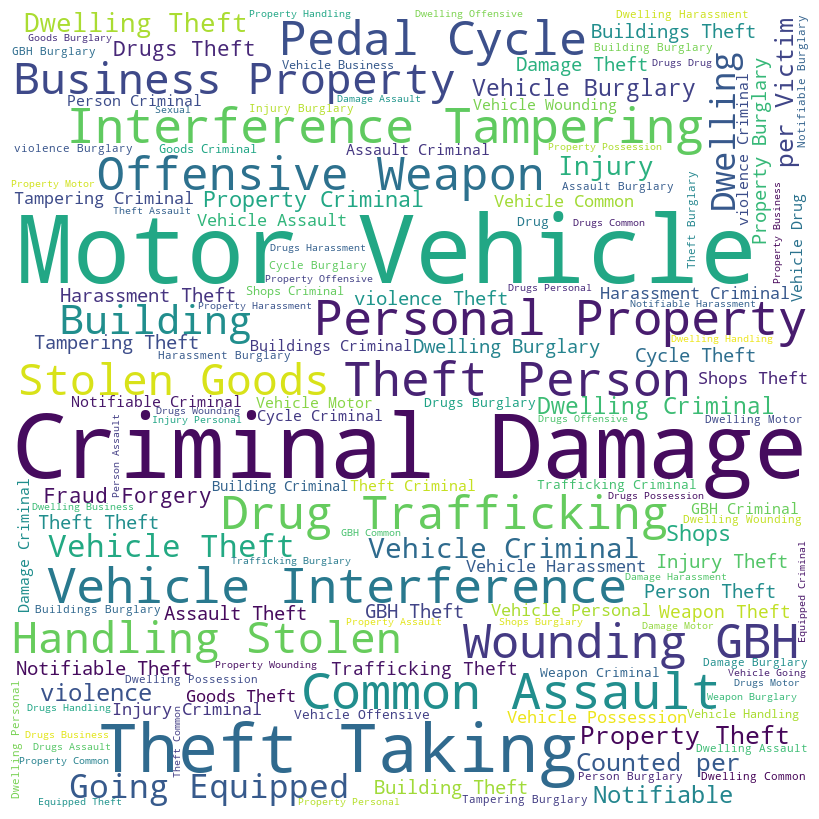

In [100]:
wc12 = df[df['year'] == 2012]['minor_category']

text12 = " ".join(wc12)


wordcloud12 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text12)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud12) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2012

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2012. Kata-kata tersebut adalah Criminal Damage dan Motor Vehicle, kemudian disusul dengan Theft Taking.

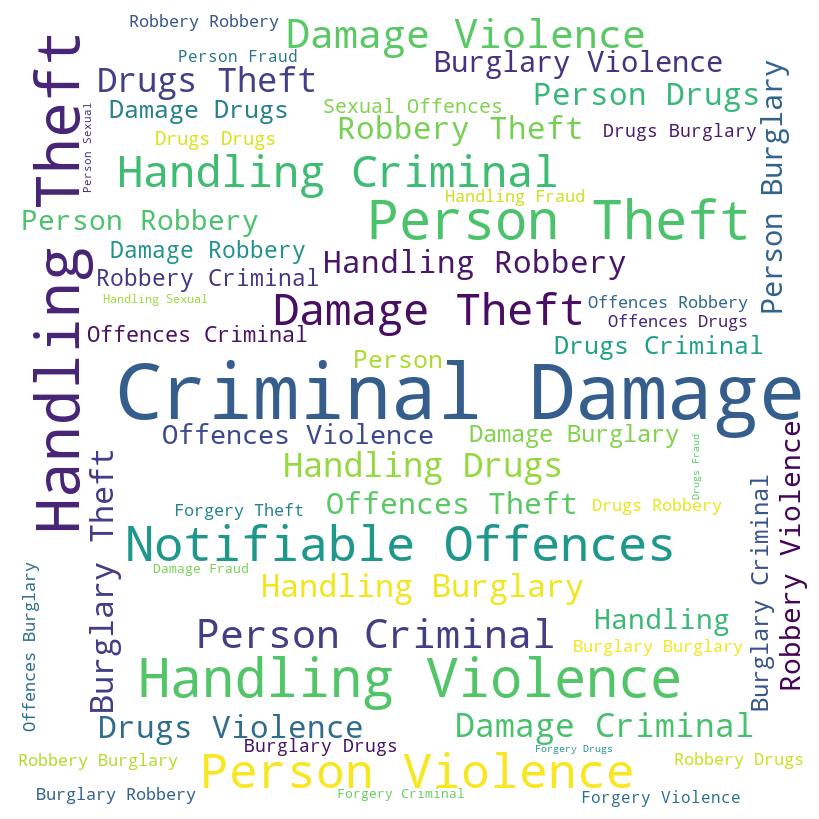

In [101]:
wc12 = df[df['year'] == 2012]['major_category']

text12 = " ".join(wc12)


wordcloud12 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text12)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud12) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2012

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2012. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft, Person Violence.

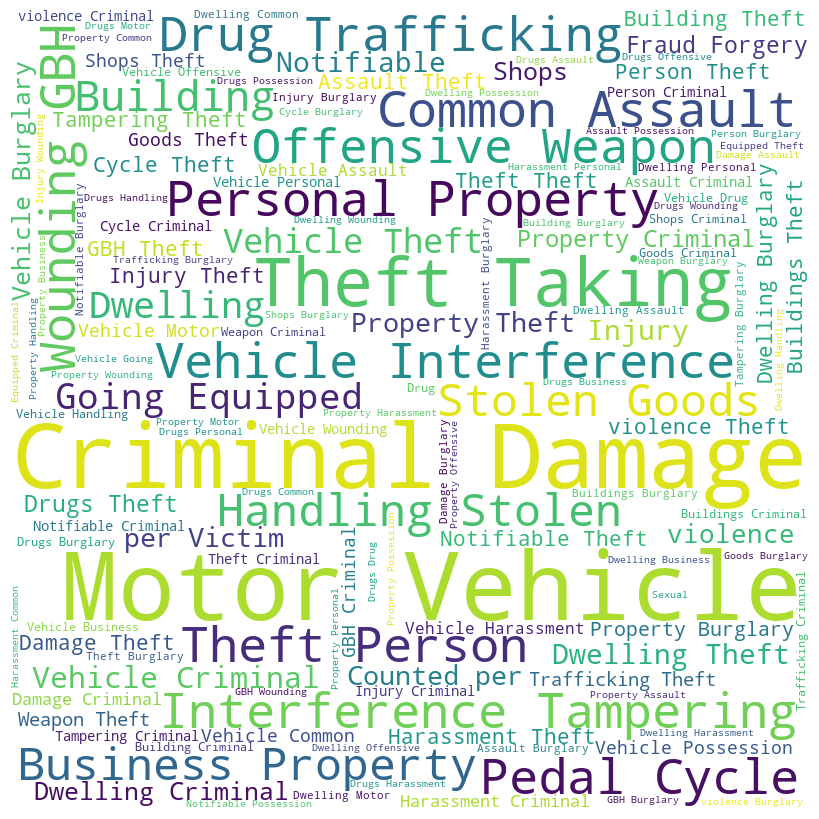

In [102]:
wc13 = df[df['year'] == 2013]['minor_category']

text13 = " ".join(wc13)


wordcloud13 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text13)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud13) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2013

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2013. Kata-kata tersebut adalah Criminal Damage, Motor Vehicle, kemudian disusul dengan Theft Taking.

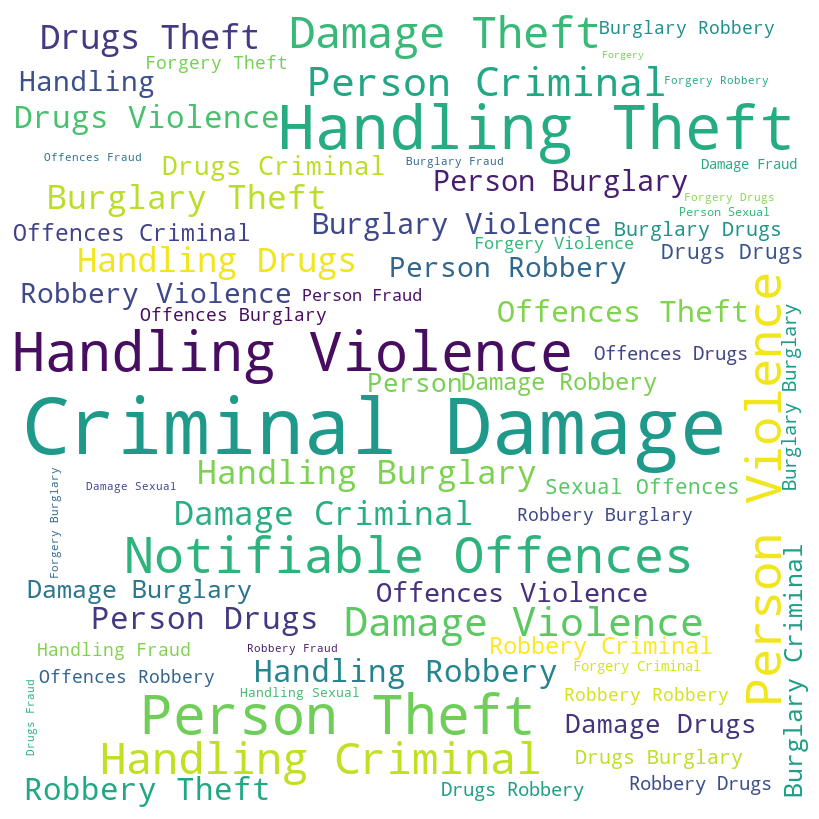

In [103]:
wc13 = df[df['year'] == 2013]['major_category']

text13 = " ".join(wc13)


wordcloud13 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text13)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud13) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2013

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2013. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

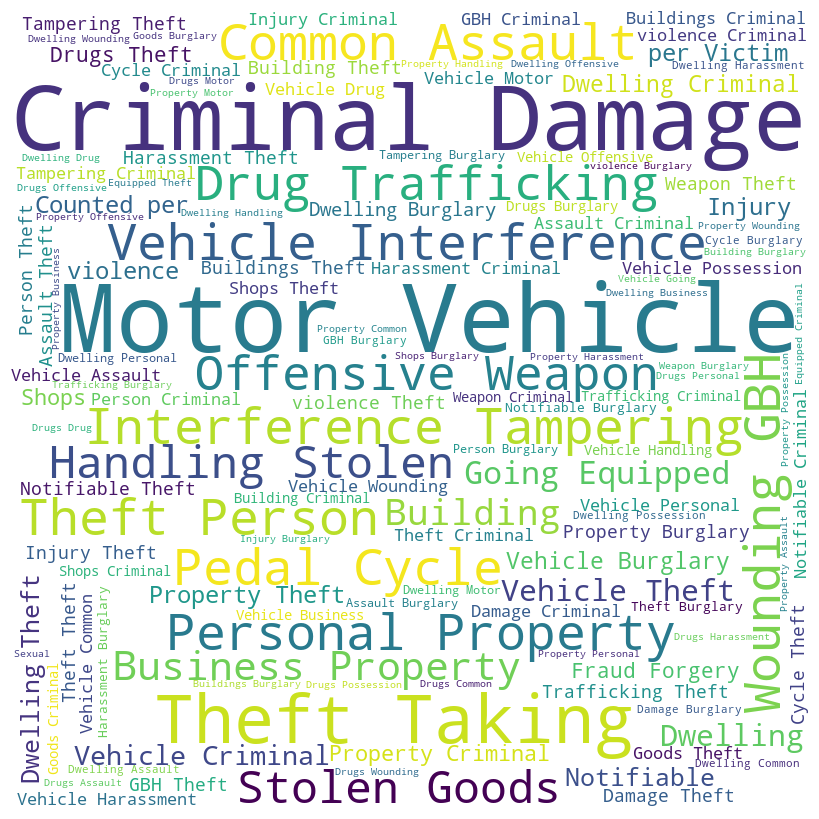

In [104]:
wc14 = df[df['year'] == 2014]['minor_category']

text14 = " ".join(wc14)


wordcloud14 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text14)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud14) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2014

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2014. Kata-kata tersebut adalah Criminal Damage, Motor Vehicle, kemudian disusul dengan Theft Taking.

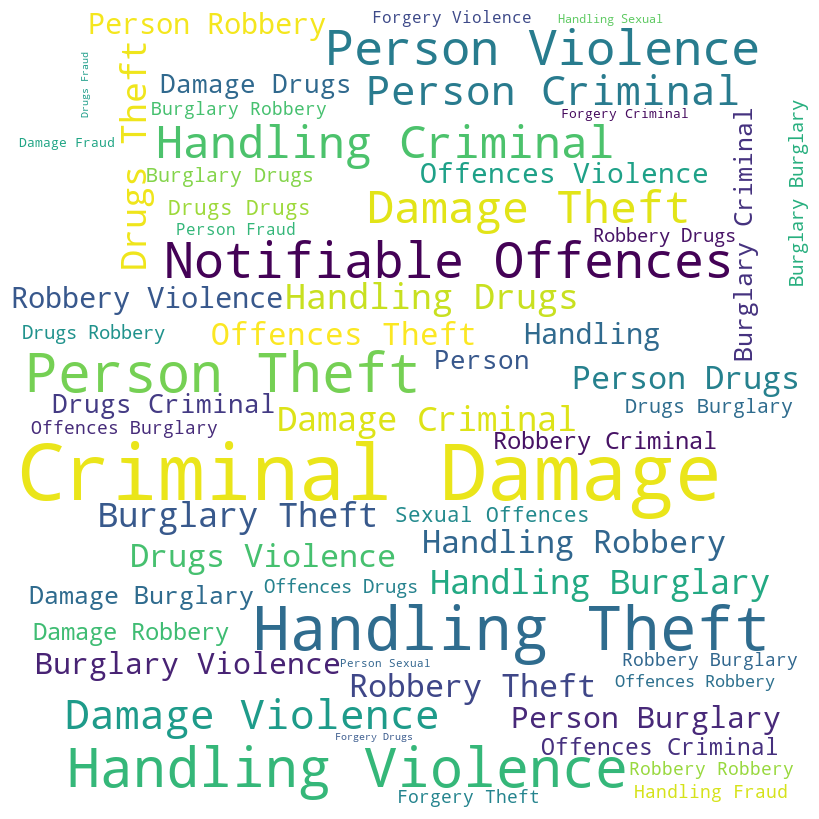

In [105]:
wc14 = df[df['year'] == 2014]['major_category']

text14 = " ".join(wc14)


wordcloud14 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text14)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud14) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2014

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2014. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

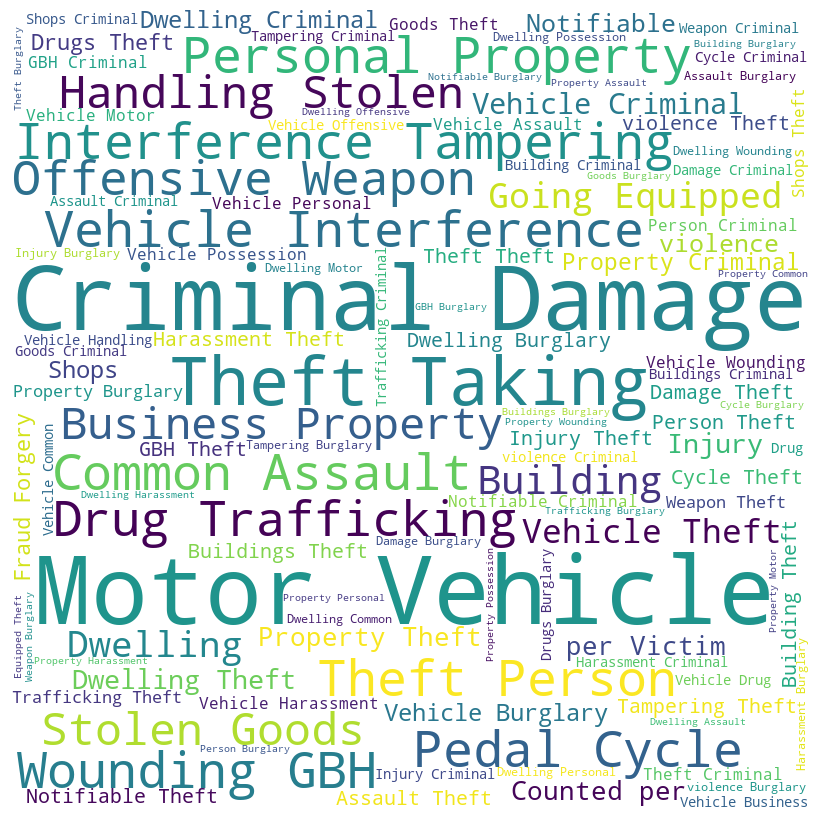

In [106]:
wc15 = df[df['year'] == 2015]['minor_category']

text15 = " ".join(wc15)


wordcloud15 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text15)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud15) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2015

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2015. Kata-kata tersebut adalah Criminal Damage dan Motor Vehicle, kemudian disusul dengan Theft Taking.

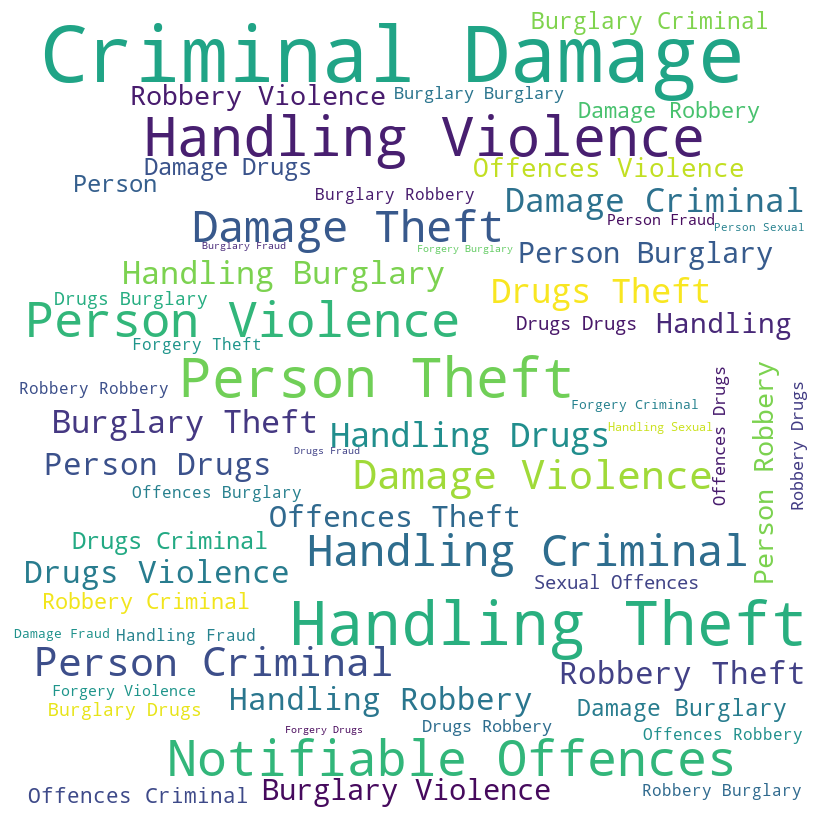

In [107]:
wc15 = df[df['year'] == 2015]['major_category']

text15 = " ".join(wc15)


wordcloud15 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text15)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud15) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2015

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2015. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

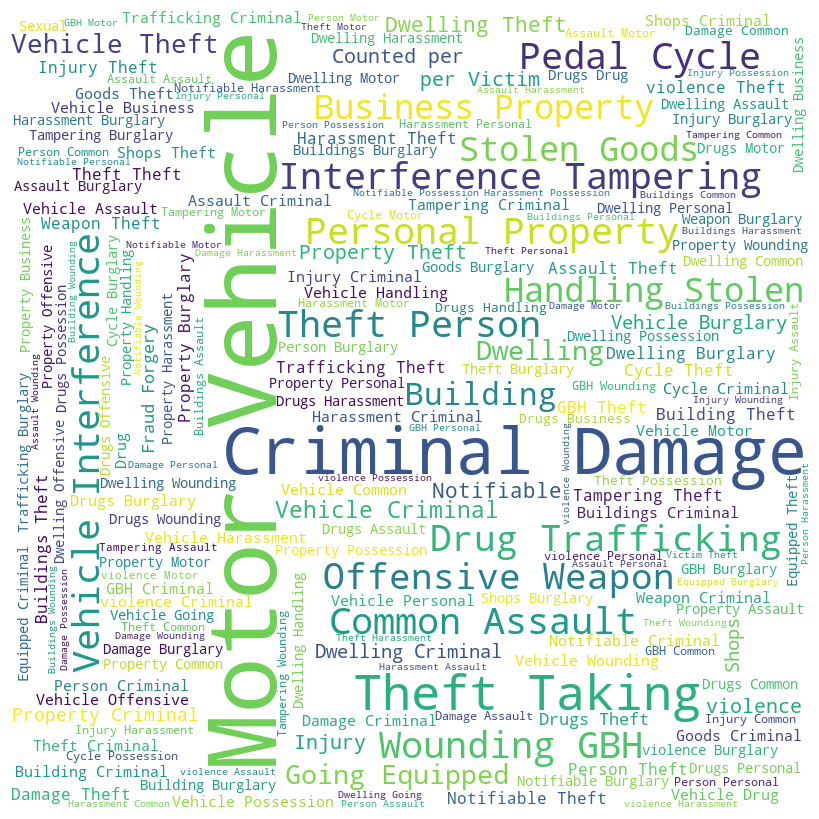

In [108]:
wc16 = df[df['year'] == 2016]['minor_category']

text16 = " ".join(wc16)


wordcloud16 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text16)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud16) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Minor 2016

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2016. Kata-kata tersebut adalah Criminal Damage, Motor Vehicle, kemudian disusul dengan Theft Taking.

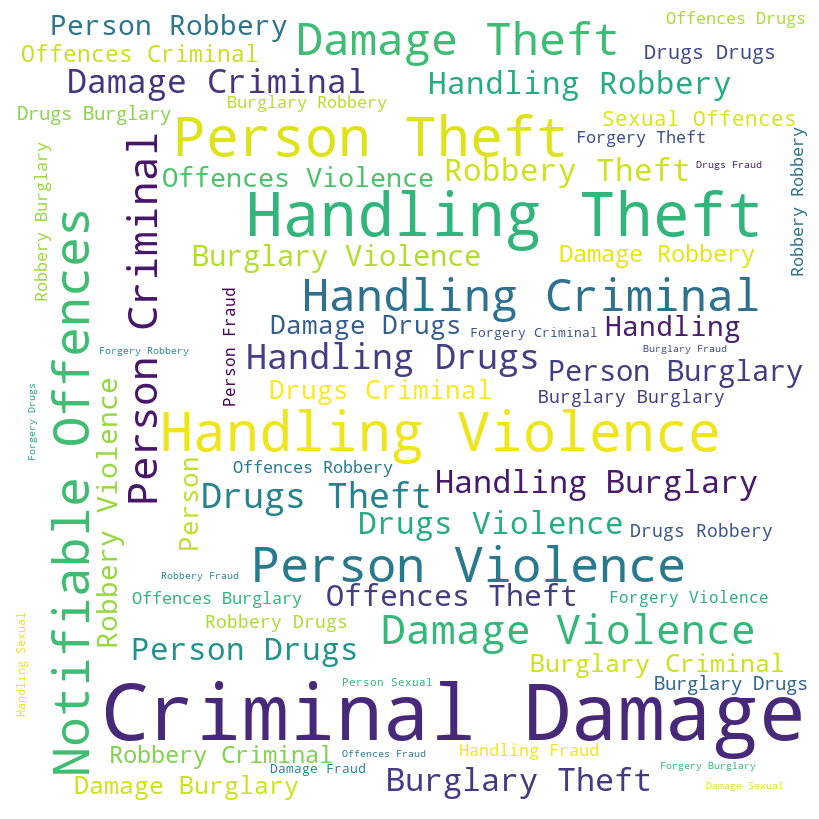

In [109]:
wc16 = df[df['year'] == 2016]['major_category']

text16 = " ".join(wc16)


wordcloud16 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text16)

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud16) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Kategori Major 2016

Pada visualisasi data Word Clouds kata-kata yang berukuran besar merupakan kejahatan yang paling sering terjadi di London pada periode 2016. Kata-kata tersebut adalah Criminal Damage, Handling Theft, Handling Violence, Person Theft.

In [110]:
df_B = dfm[(dfm['major_category'] == 'Burglary')]
df_V = dfm[(dfm['major_category'] == 'Violence Against the Person')]
df_C = dfm[(dfm['major_category'] == 'Criminal Damage')]
df_R = dfm[(dfm['major_category'] == 'Robbery')]
df_T = dfm[(dfm['major_category'] == 'Theft and Handling')]
df_D = dfm[(dfm['major_category'] == 'Drugs')]
df_F = dfm[(dfm['major_category'] == 'Fraud or Forgery')]
df_N = dfm[(dfm['major_category'] == 'Other Notifiable Offences')]
df_S = dfm[(dfm['major_category'] == 'Sexual Offences')]

df_N

major_category  value  year
45        Other Notifiable Offences      0  2015
60        Other Notifiable Offences      0  2008
102       Other Notifiable Offences      0  2008
108       Other Notifiable Offences      0  2009
116       Other Notifiable Offences      0  2015
...                             ...    ...   ...
13490525  Other Notifiable Offences      0  2012
13490531  Other Notifiable Offences      0  2012
13490553  Other Notifiable Offences      0  2011
13490559  Other Notifiable Offences      0  2012
13490561  Other Notifiable Offences      0  2015

[776304 rows x 3 columns]

In [111]:
bg1 = (df_B.groupby('year', axis = 0).sum())
bg1.index.name = None
bg2 = bg1.rename(columns = {'value':'Burglary'}, inplace=False)

vc1 = (df_V.groupby('year', axis = 0).sum())
vc1.index.name = None
vc2 = vc1.rename(columns = {'value':'Violence Against the Person'}, inplace=False)

cd1 = (df_C.groupby('year', axis = 0).sum())
cd1.index.name = None
cd2 = cd1.rename(columns = {'value':'Criminal Damage'}, inplace=False)

rb1 = (df_R.groupby('year', axis = 0).sum())
rb1.index.name = None
rb2 = rb1.rename(columns = {'value':'Robbery'}, inplace=False)

th1 = (df_T.groupby('year', axis = 0).sum())
th1.index.name = None
th2 = th1.rename(columns = {'value':'Theft and Handling'}, inplace=False)

dr1 = (df_D.groupby('year', axis = 0).sum())
dr1.index.name = None
dr2 = dr1.rename(columns = {'value':'Drugs'}, inplace=False)

ff1 = (df_F.groupby('year', axis = 0).sum())
ff1.index.name = None
ff2 = ff1.rename(columns = {'value':'Fraud or Forgery'}, inplace=False)

nt1 = (df_N.groupby('year', axis = 0).sum())
nt1.index.name = None
nt2 = nt1.rename(columns = {'value':'Other Notifiable Offences'}, inplace=False)

sx1 = (df_S.groupby('year', axis = 0).sum())
sx1.index.name = None
sx2 = sx1.rename(columns = {'value':'Sexual Offences'}, inplace=False)

In [112]:
df_crime = (pd.concat([th2, vc2, dr2, bg2, cd2, rb2, nt2, ff2, sx2], axis=1)).transpose()

df_crimes = df_crime[[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]]
df_crimes['major_category'] = ['Theft and Handling', 'Violence Against the Person', 'Drugs', 'Burglary', 'Criminal Damage', 'Robbery', 'Other Notifiable Offences', 'Fraud or Forgery', 'Sexual Offences']
df_crimes.set_index('major_category', inplace=True)
df_crimes

2008    2009    2010    2011    2012    2013  \
major_category                                                                
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Drugs                         68804   60549   58674   57550   51776   50278   
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Robbery                       29627   29568   32341   36679   35260   29337   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Fraud or Forgery               5325       0       0       0       0       0   
Sexual Offences                1273       0       0       0       0       0   

                               2014    2015    2016  
major_category                                       
Theft and Handling           279880  284022  294133  
Violence Against the Person  185349  218740  232381  
Drugs                         44435   39785   38914  
Burglary                      76053   70489   68285  
Criminal Damage               59279   62976   64071  
Robbery                       22150   21383   22528  
Other Notifiable Offences     13037   14229   15809  
Fraud or Forgery                  0       0       0  
Sexual Offences                   0       0       0

In [113]:
df_crimes['Total'] =  df_crimes.sum (axis = 1)

In [114]:
df_crimes

2008    2009    2010    2011    2012    2013  \
major_category                                                                
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Drugs                         68804   60549   58674   57550   51776   50278   
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Robbery                       29627   29568   32341   36679   35260   29337   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Fraud or Forgery               5325       0       0       0       0       0   
Sexual Offences                1273       0       0       0       0       0   

                               2014    2015    2016    Total  
major_category                                                
Theft and Handling           279880  284022  294133  2661861  
Violence Against the Person  185349  218740  232381  1558081  
Drugs                         44435   39785   38914   470765  
Burglary                      76053   70489   68285   754293  
Criminal Damage               59279   62976   64071   630938  
Robbery                       22150   21383   22528   258873  
Other Notifiable Offences     13037   14229   15809   106349  
Fraud or Forgery                  0       0       0     5325  
Sexual Offences                   0       0       0     1273

In [115]:
total_crimes = df_crimes.Total.sum()
total_crimes

6447758

In [116]:
max_words = 90
word_string = ''
for major_category in df_crimes.index.values:
    # check if country's name is a single-word name
    if len(major_category.split(' ')) == 1:
        repeat_num_times = int(df_crimes.loc[major_category, 'Total']/float(total_crimes)*max_words)
        word_string = word_string + ((major_category + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Drugs Drugs Drugs Drugs Drugs Drugs Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Robbery Robbery Robbery '

In [117]:
wordcloud = WordCloud(background_color = 'white').generate(word_string)

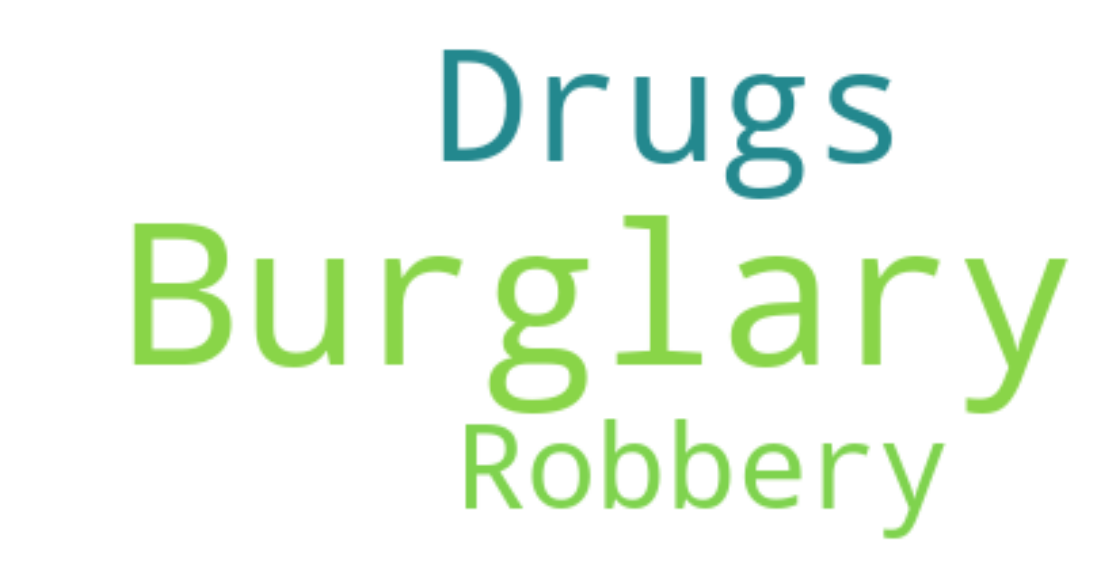

In [118]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [119]:
max_words = 90
word_string = ''
for major_category in df_crimes.index.values:
    # check if country's name is a single-word name
    if len(major_category.split(' ')) >= 2:
        repeat_num_times = int(df_crimes.loc[major_category, 'Total']/float(total_crimes)*max_words)
        word_string = word_string + ((major_category + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Theft and Handling Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against the Person Violence Against

In [120]:
wordcloud = WordCloud(background_color = 'white').generate(word_string)

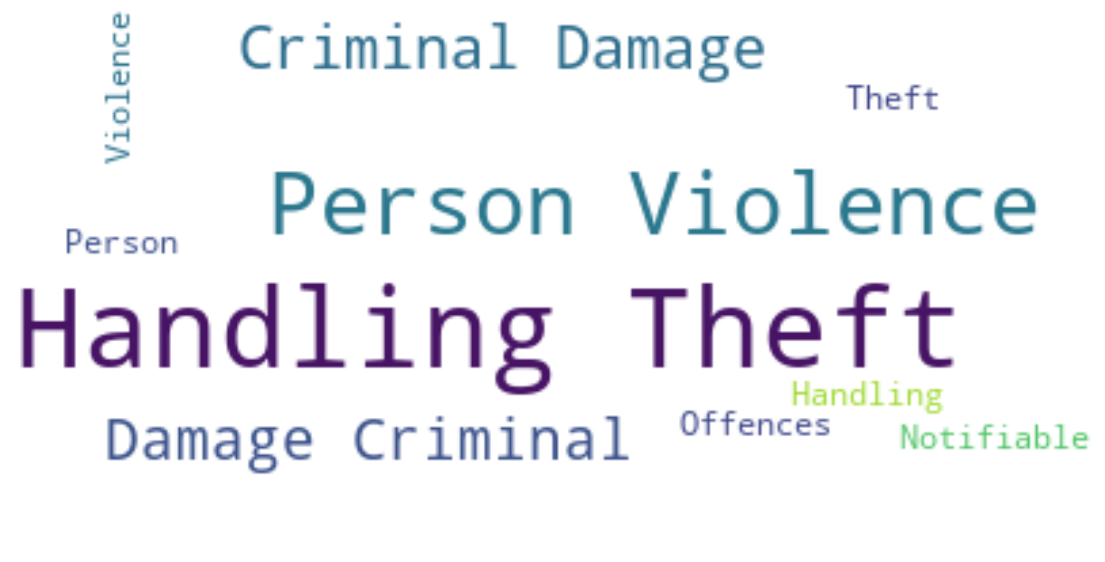

In [121]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## REGRESSION PLOT

In [122]:
import seaborn as sns

In [123]:
scplt1 = scplt
scplt1

value  year
0  738641  2008
1  717214  2009
2  715324  2010
3  724915  2011
4  737329  2012
5  686407  2013
6  680183  2014
7  711624  2015
8  736121  2016

In [124]:
scplt1['year'] = scplt1['year'].astype(float)

In [125]:
scplt1

value    year
0  738641  2008.0
1  717214  2009.0
2  715324  2010.0
3  724915  2011.0
4  737329  2012.0
5  686407  2013.0
6  680183  2014.0
7  711624  2015.0
8  736121  2016.0

In [126]:
scplt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   9 non-null      int64  
 1   year    9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0 bytes


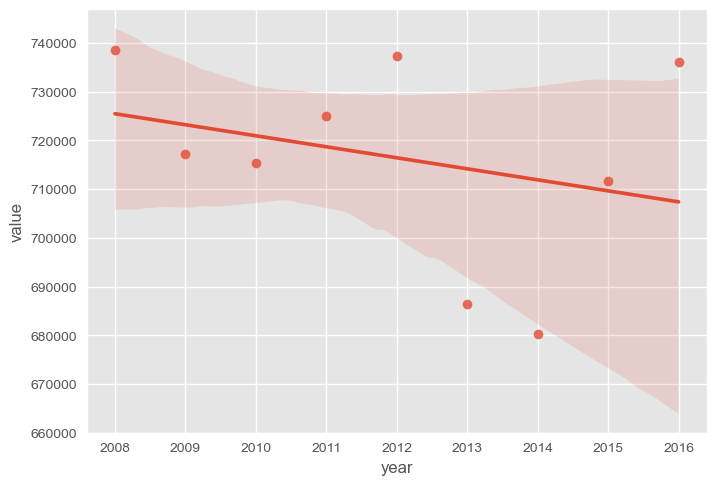

In [127]:
ax = sns.regplot(x='year', y='value', data=scplt1)

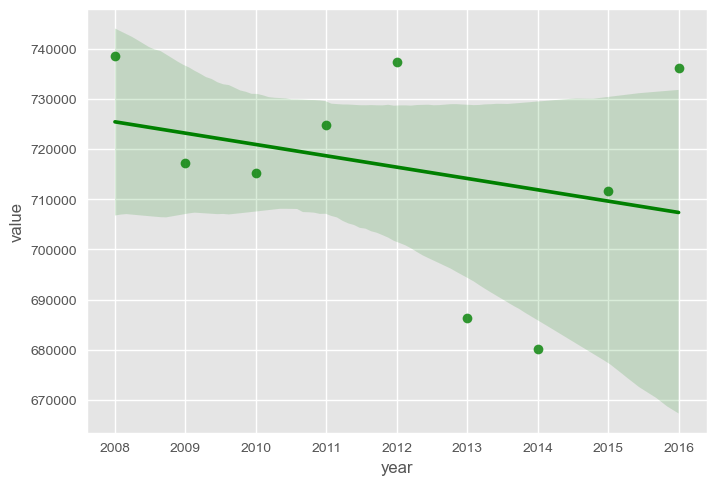

In [128]:
ax = sns.regplot(x='year', y='value', data=scplt, color = 'green')

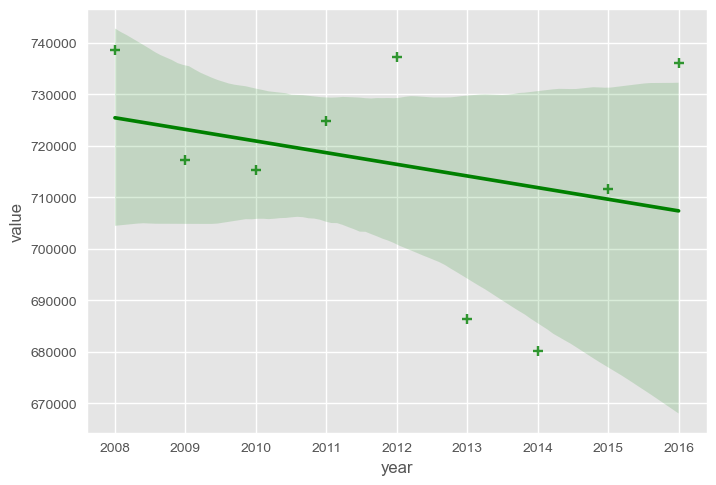

In [129]:
ax = sns.regplot(x='year', y='value', data=scplt, color = 'green', marker = '+')

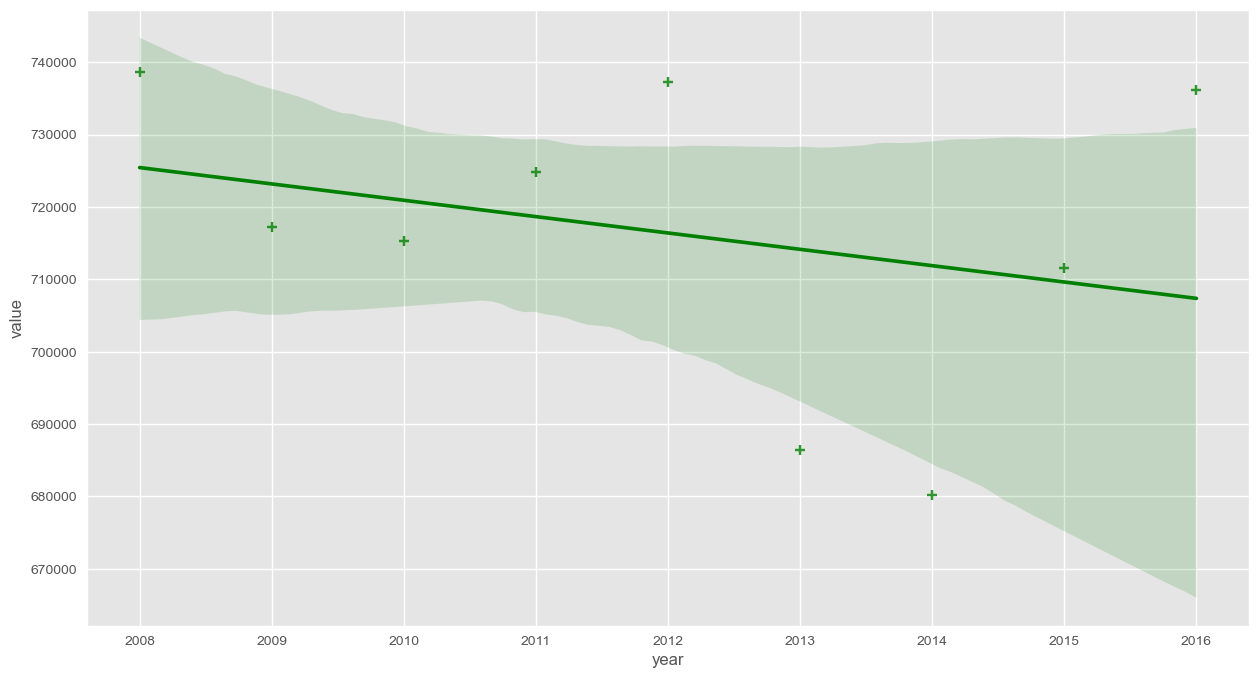

In [130]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x='year', y='value', data=scplt, color = 'green', marker = '+')

Text(0.5, 1.0, 'Total Crime in London 2008-2016')

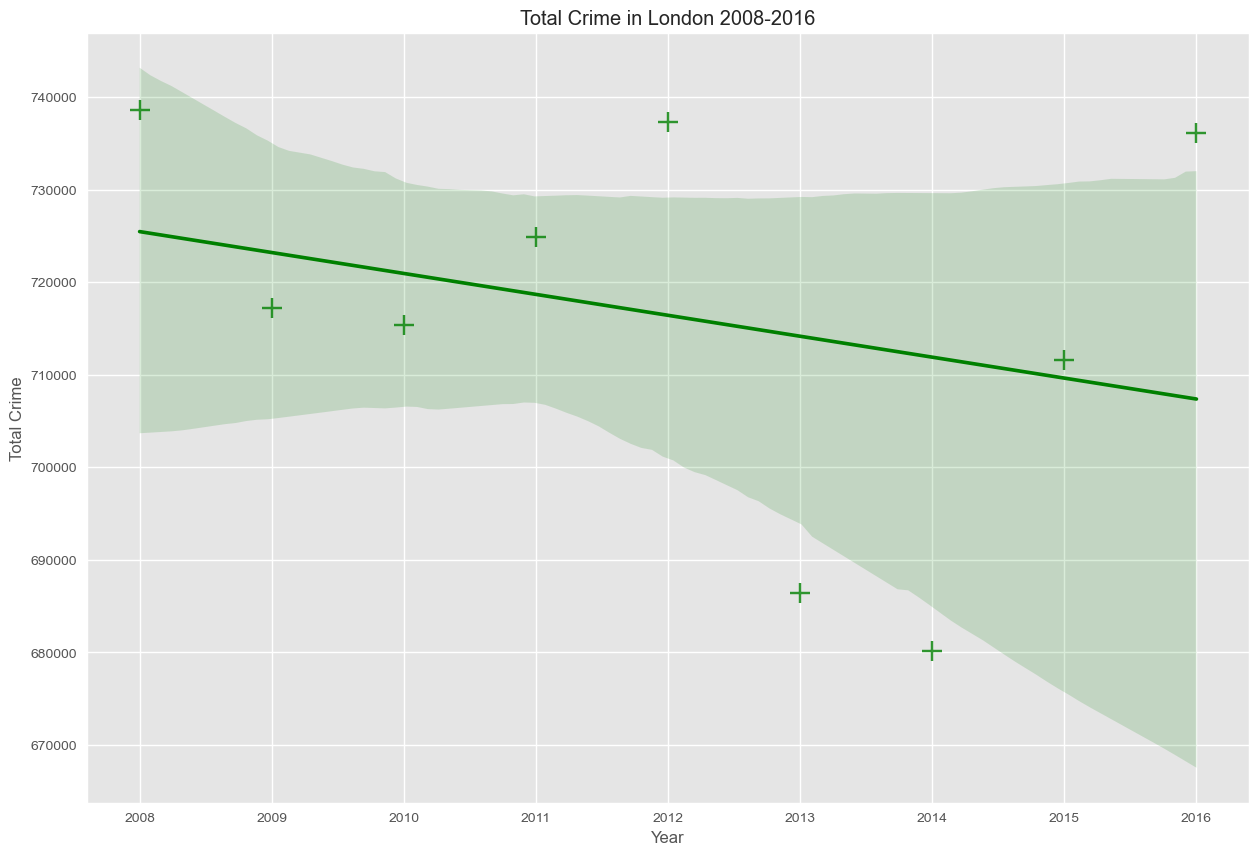

In [131]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='value', data=scplt, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Crime') # add x- and y-labels
ax.set_title('Total Crime in London 2008-2016') # add title

Text(0.5, 1.0, 'Total Crime in London 2008-2016')

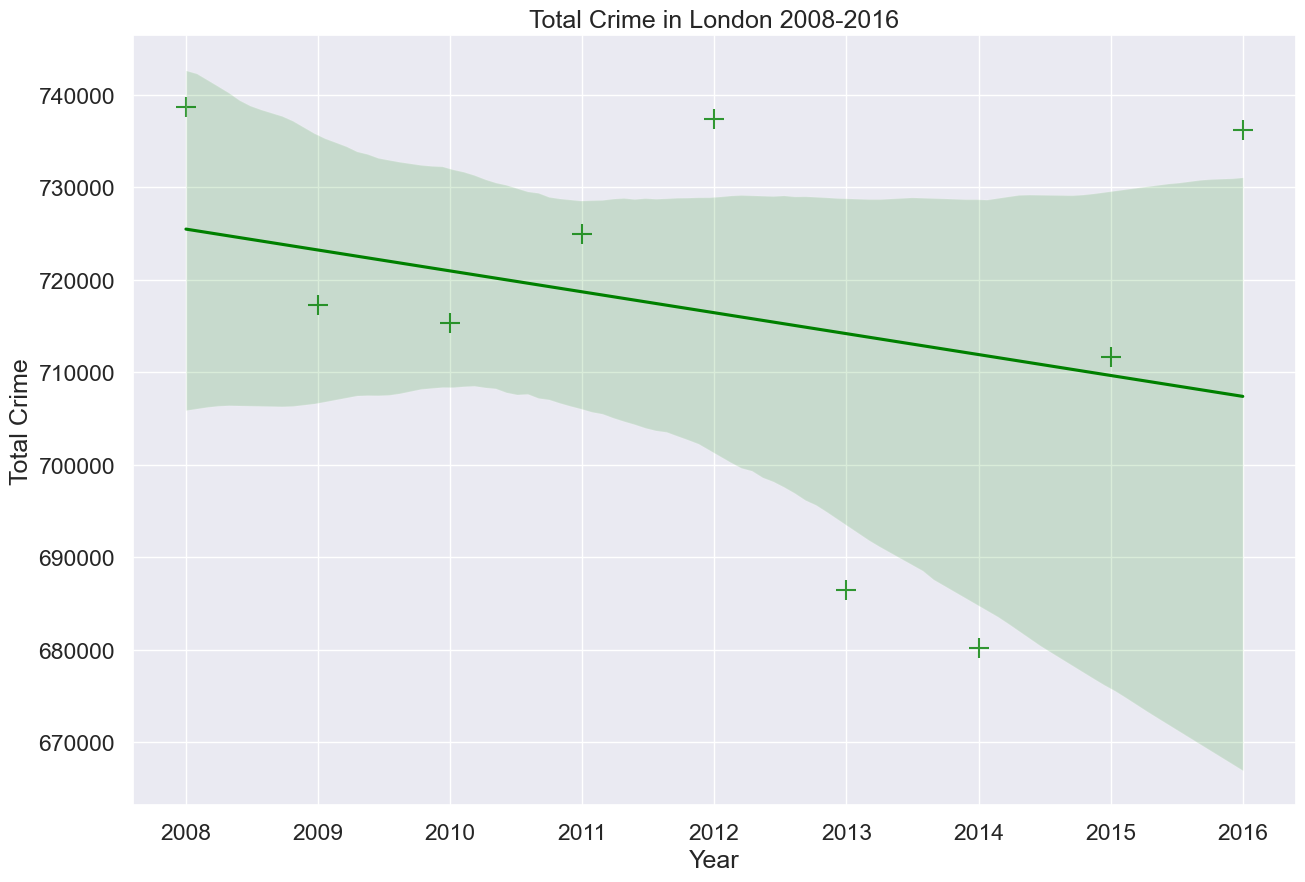

In [132]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='value', data=scplt, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Crime') # add x- and y-labels
ax.set_title('Total Crime in London 2008-2016') # add title

Text(0.5, 1.0, 'Total Crime in London 2008-2016')

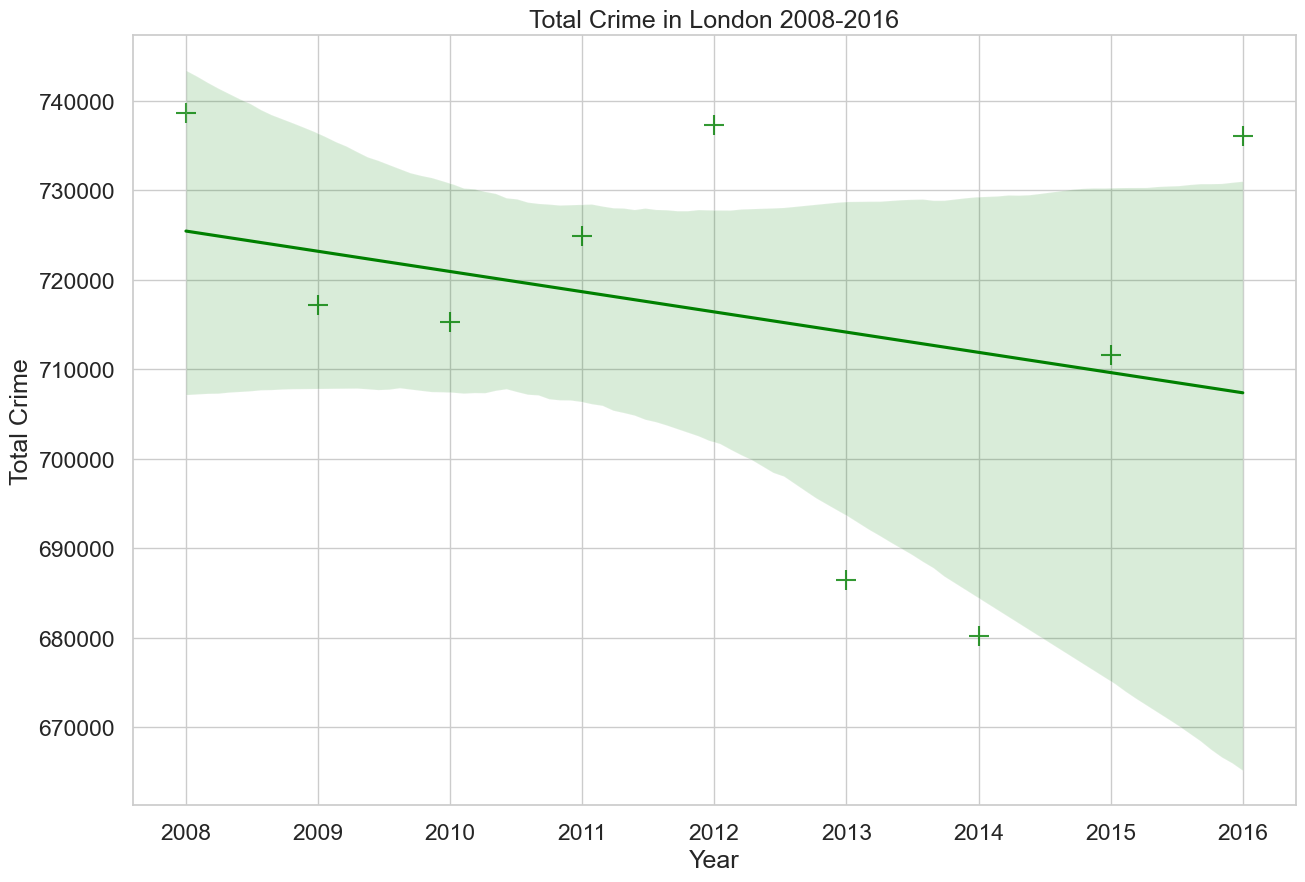

In [133]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='value', data=scplt, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Crime') # add x- and y-labels
ax.set_title('Total Crime in London 2008-2016') # add title

## FOLIUM MAPS

In [134]:
import folium

In [135]:
world_map = folium.Map()

world_map

In [136]:
world_map = folium.Map(location=[51.5072, -0.1275], zoom_start=13)

world_map

In [137]:
world_map = folium.Map(location=[51.5072, -0.1275], zoom_start=15)
# display world map
world_map

## STAMEN TONER MAPS

In [138]:
world_map = folium.Map(location=[51.5072, -0.1275], zoom_start=13, tiles = 'Stamen Toner')

world_map

## STAMEN TERRAIN MAPS

In [139]:
world_map = folium.Map(location=[51.5072, -0.1275], zoom_start=13, tiles = 'Stamen Terrain')

world_map

## WAFFLE CHART

In [140]:
df_crimes

2008    2009    2010    2011    2012    2013  \
major_category                                                                
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Drugs                         68804   60549   58674   57550   51776   50278   
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Robbery                       29627   29568   32341   36679   35260   29337   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Fraud or Forgery               5325       0       0       0       0       0   
Sexual Offences                1273       0       0       0       0       0   

                               2014    2015    2016    Total  
major_category                                                
Theft and Handling           279880  284022  294133  2661861  
Violence Against the Person  185349  218740  232381  1558081  
Drugs                         44435   39785   38914   470765  
Burglary                      76053   70489   68285   754293  
Criminal Damage               59279   62976   64071   630938  
Robbery                       22150   21383   22528   258873  
Other Notifiable Offences     13037   14229   15809   106349  
Fraud or Forgery                  0       0       0     5325  
Sexual Offences                   0       0       0     1273

In [141]:
# compute the proportion of each category with respect to the total
total_values = sum(df_crimes['Total'])
category_proportions = [(float(value) / total_values) for value in df_crimes['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_crimes.index.values[i] + ': ' + str(proportion))

Theft and Handling: 0.4128351281174014
Violence Against the Person: 0.24164694146399415
Drugs: 0.07301220051993267
Burglary: 0.1169853148955032
Criminal Damage: 0.0978538586590874
Robbery: 0.04014930461099812
Other Notifiable Offences: 0.0164939503002439
Fraud or Forgery: 0.0008258684646663228
Sexual Offences: 0.00019743296817281293


In [142]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [143]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_crimes.index.values[i] + ': ' + str(tiles))

Theft and Handling: 165
Violence Against the Person: 97
Drugs: 29
Burglary: 47
Criminal Damage: 39
Robbery: 16
Other Notifiable Offences: 7
Fraud or Forgery: 0
Sexual Offences: 0


In [144]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# # populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [145]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 4.,
        4., 4., 5., 5., 5., 5., 6., 6.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 6., 6.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 6., 6.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 6., 7.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 4., 4., 4.,
        4., 4., 5., 5., 5., 5., 6., 7.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   

<Figure size 800x550 with 0 Axes>

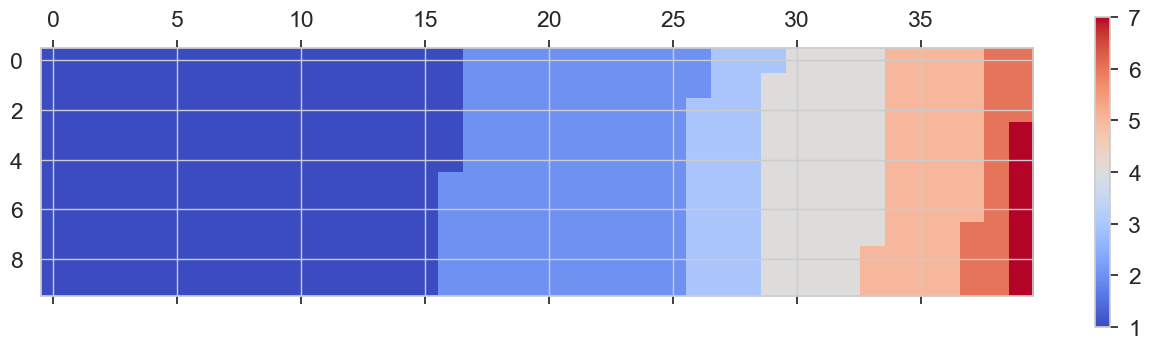

In [146]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 800x550 with 0 Axes>

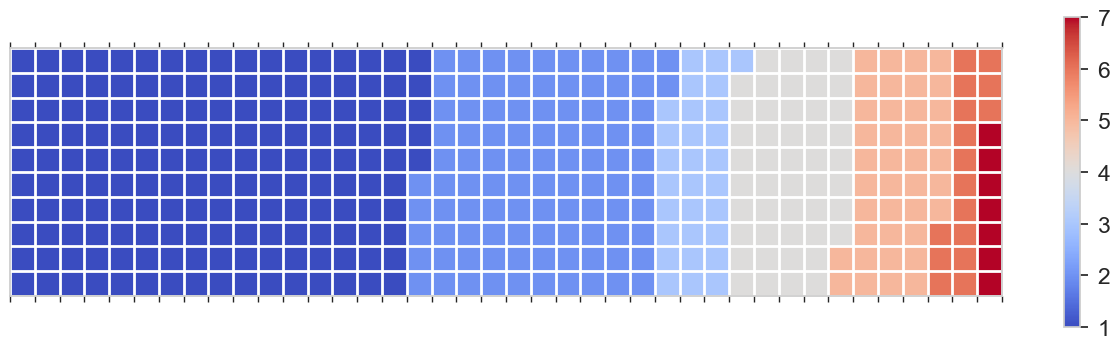

In [147]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 800x550 with 0 Axes>

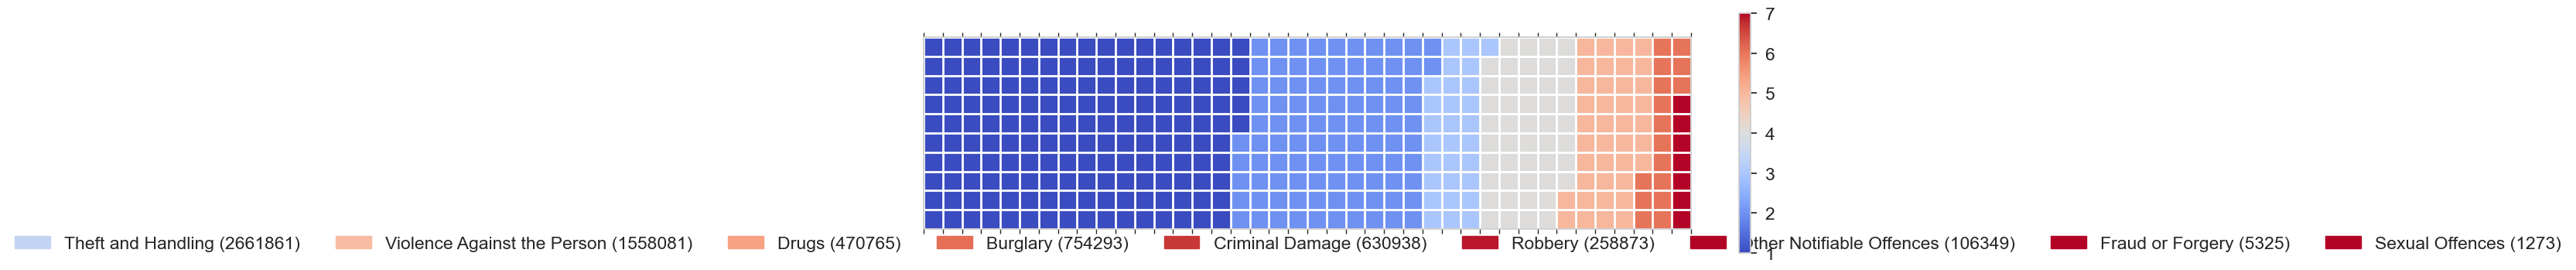

In [148]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_crimes['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_crimes.index.values):
    label_str = category + ' (' + str(df_crimes['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_crimes.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [149]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_crimes.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Theft and Handling: 165
Violence Against the Person: 97
Drugs: 29
Burglary: 47
Criminal Damage: 39
Robbery: 16
Other Notifiable Offences: 7
Fraud or Forgery: 0
Sexual Offences: 0


<Figure size 800x550 with 0 Axes>

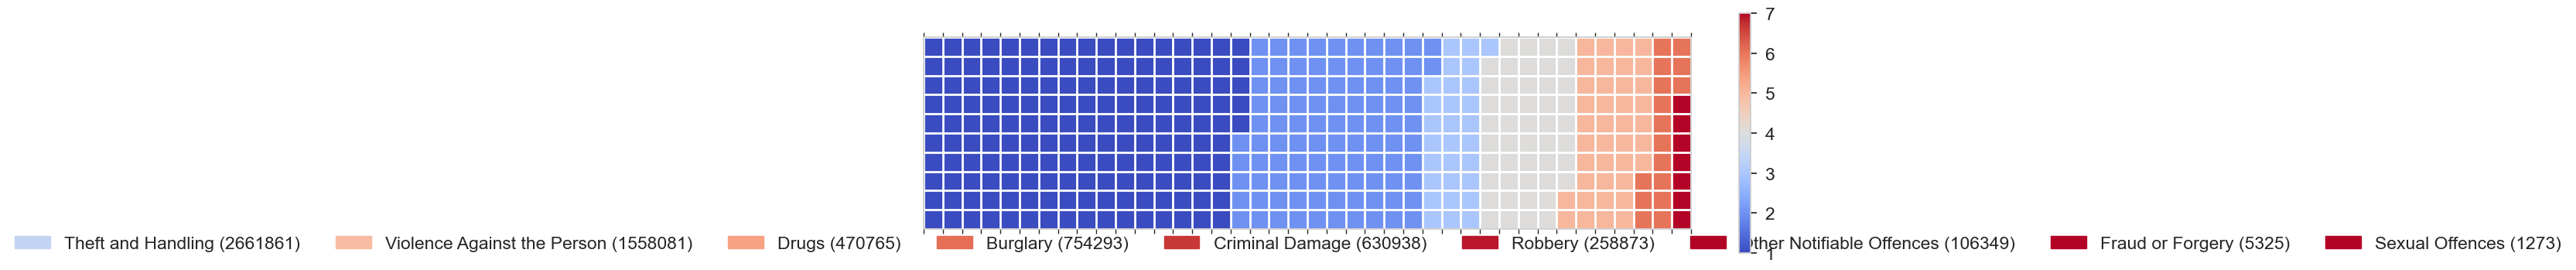

In [150]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_crimes.index.values # categories
values = df_crimes['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)